# Финальный проект: Выявление профилей потребления магазина - Розов К.А.

## Описание проекта / Декомпозиция задачи

Для интернет-магазина товаров для дома «Пока все ещё тут», необходимо **выявить профили покупателей, а также сделать полноценный анализ товарного ассортимента**. Результаты анализа и рекомендации должны помочь управлению магазина увеличить продажи и лучше понять выбор покупателей. 

**Цели проекта**:
 - проведение исследовательского анализа данных;
 - сегментирование покупателей по признакам: категория покупаемого товара, средний чек, количетсво товаров в заказе;
 - анализ товарного ассортимента по сегментам;
 - формулировка и проверка гипотез.

**Описание данных**:
*таблица `ecom_dataset_upd.csv` (датасет описывает транзакции интернет-магазина товаров для дома и быта)*

 - date — дата заказа;
 - customer_id — идентификатор покупателя;
 - order_id — идентификатор заказа;
 - product — наименование товара;
 - quantity — количество товара в заказе;
 - price — цена товара.

**Ход выполнения проекта**:

Шаг 1. Загрузка, первичный осмотр и предобработка данных
 - 1.1. Импорт библиотек и загрузка данных;
 - 1.2. Осмотр данных;
 - 1.3. Предобработка данных;
   - 1.3.1. Поиск и обработка дубликатов;
     - 1.3.1.1. Проверка на бизнес-правило "1 заказ - 1 клиент";
     - 1.3.1.2. Проверка на бизнес-правило "1 заказ - 1 дата";
   - 1.3.2. Обработка выбросов;
   - 1.3.3 Добавление новых столбцов;
 - 1.4. Выводы о данных.
 
Шаг 2. Исследовательский анализ данных
 - 2.1. Анализ периода, за который совершались покупки. Поиск аномалий и закономерностей в датах заказов;
 - 2.2. Анализ активности покупателей(количества заказов): поиск аномалий, анализ распределения по времени, построение графика;
 - 2.2. Анализ выручки c заказов: какие товары интернет-магазина приносят наибольшую прибыль. Как меняется эта метрика с течением времени.  
 - 2.4. Анализ данных о времени совершения покупок:
   - 2.4.1. Определение периода, данными за который мы располагаем;
   - 2.4.2. Выделение сезонов и дней недели к активностям покупателей; 
 - 2.5. Построение матрицы корреляций;
 - 2.6. Выводы по результатам шага.
 
Шаг 3. Категоризация и анализ товарного ассортимента
 - 3.1. Категоризация товаров;
 - 3.2. Определение топ самых продаваемых товаров в каждой категории по кол-ву заказов за весь период;
 - 3.3. Определение топ самых прибыльных товаров в каждой категории за весь период;
 - 3.4. Расчет выручки и количества покупателей по категориям;
 - 3.5. Анализ сезонности товаров по категориям;
 - 3.6. Выводы по результатам шага.
 
Шаг 4. Сегментация покупателей на основе истории их покупок
 - 4.1. Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков;
 - 4.2. Кластеризация на основании алгоритма K-Means и определение сегментов покупателей;
 - 4.3. Выводы по результатам шага.
 
Шаг 5. Проверка статистических гипотез
 - 5.1. Расчет статистической значимости различий в среднем чеке заказа между сегментами покупателей; 
 - 5.2. Расчет статистической значимости различий в среднем объёме продаж между сегментами покупателей;
 - 5.3. Расчет статистической значимости различий в среднем объёме продаж в будни и выходные одинаковые;
 - 5.4. Выводы по результатам шага.
 
Шаг 6. Выводы по результатам всего анализа и рекомендации

Шаг 7. Ссылка на презентацию

## Загрузка, первичный осмотр и предобработка данных

### Импорт библиотек и загрузка данных

In [56]:
# загружаем необходимые библиотеки
# для анализа данных
import pandas as pd
import numpy as np
import datetime as dt

# для визуализации данных
import seaborn as sns                                       
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
# для лемматизации и сегментации данных
from pymystem3 import Mystem                                
from collections import Counter
import scipy.stats as stats
from scipy import stats as st
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from pymystem3 import Mystem                                
from collections import Counter

from sklearn.preprocessing import StandardScaler            
from sklearn.cluster import KMeans                          
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage     

# для предупреждений в программе
import warnings 
warnings.filterwarnings('ignore') 

In [57]:
# настроим удобное отображение данных при выводе
pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', '{:.2f}'.format)

In [58]:
# загружаем данные
data = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')

In [59]:
display(data.sample(10))
display(data.info()) # основная информация о датасете
display('Размер датасета:', data.shape) # посмотрим на размер датасета
display('Статистика:',data.describe().T) # выведем статистику о датасете методом describe()
display('Число дубликатов:', data.duplicated().sum())# количество явных дубликатов
display('Количество пропусков', data.isna().sum()) # количество пропусков в датасете
display('Доля пропусков', round(data.isna().sum()/len(data)*100,1)) # доля пропусков в датасете

date                           customer_id  order_id  \
2957  2019041916  5f6d318b-4ed0-4163-8767-2959bc2e6c76     14663   
6873  2019112006  dd8b741a-4493-4498-ad5e-37cb4bd91715    105299   
4699  2019060608  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
5946  2019072410  55ea5358-8698-41c0-ba44-2b15d7d8273a     72095   
3150  2019042509  d1c5bf9b-4b85-49c6-86af-77b20c5d6034     14691   
1561  2019012118  6e9a859b-b863-43ec-8efb-6570bdb4ea5f     69908   
2313  2019031319  bd57cbda-03d8-4758-85e3-b9c671b6bca0     14572   
1724  2019020619  3bff3367-00fe-4cc1-a058-d5d61aecff6a     70132   
3191  2019042621  8cf3c949-8d92-40ad-a5fa-d67a4b49456d     71300   
6061  2019080620  8b2b91ad-735a-40c3-ab0f-2e731b449090     72225   

                                                product  quantity   price  
2957  Рассада зелени для кухни Розмарин Оффициналис ...         1  120.00  
6873                                    Соланум d-10 см         1  142.00  
4699     Пеларгония плющелистная ампельная, диам. 12 см         1  142.00  
5946     Стремянка DOGRULAR КЛАСС ПЛЮС 4 ступени 123304         1 1424.00  
3150  Пеларгония розебудная Prins Nikolai укорененны...         1  135.00  
1561  Штора для ванной Spirella / Спирелла TEX Porto...         1 2399.00  
2313  Бакопа ампельная махровая белая махровая объем...         2   82.00  
1724  Тележка багажная DELTA ТБР-20 синий грузоподъе...         1  727.00  
3191  Коврик Dasch для ванной комнаты 50х80 см HJ-C ...         1  637.00  
6061  Штора для ванной комнаты Cannetto 240х200 см к...         1 1199.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


None

'Размер датасета:'

(7474, 6)

'Статистика:'

count          mean       std           min           25%  \
date     7474.00 2018912614.03 427887.84 2018100100.00 2019021713.00   
order_id 7474.00      49449.88  32679.64      12624.00      14833.00   
quantity 7474.00          2.36     14.50          1.00          1.00   
price    7474.00        478.74    901.62          9.00         97.00   

                   50%           75%           max  
date     2019051409.00 2019063013.00 2020013115.00  
order_id      68768.00      71257.75     112789.00  
quantity          1.00          1.00       1000.00  
price           135.00        439.00      14917.00

'Число дубликатов:'

0

'Количество пропусков'

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

'Доля пропусков'

date          0.00
customer_id   0.00
order_id      0.00
product       0.00
quantity      0.00
price         0.00
dtype: float64

**Наблюдения:**
 - некорректный тип данных в дате;
 - присутствует разный регистр букв в столбце с описанием товара;
 - возможно, присутствуют дубликаты в столбце с наименованием товара и идентификатором заказа;

Пропуски не обнаружены.

### Предобработка данных

Рассмотрим значения в столбце `date`.

In [60]:
# приведем дату к формату даты
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H') 

In [61]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7474 non-null   datetime64[ns]
 1   customer_id  7474 non-null   object        
 2   order_id     7474 non-null   int64         
 3   product      7474 non-null   object        
 4   quantity     7474 non-null   int64         
 5   price        7474 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 350.5+ KB


None

#### Проверка на бизнес-правило "1 заказ - 1 клиент

Рассмотрим значения в столбце `product и order_id`.

In [62]:
data['product'] = data['product'].str.lower() # приведем описание товара к нижнему регистру
data['product'] = data['product'].str.replace('ё','е', regex=True)
#data['product'] = data['product'].str.replace('(', '', regex=True) 
#data['product'] = data['product'].str.replace(')', '', regex=True) 
data['product'] = data['product'].str.replace(',', '', regex=True) 

In [63]:
# проверка на отсутствие дубликатов
total_duplicates = data.duplicated().sum()  
partial_duplicates_product_cust_order = len(data[data[['product', 'customer_id', 'order_id']].duplicated() == True][['customer_id', 'order_id']])

display('Количество полных дубликатов: {} строк'.format(total_duplicates))
display('Количество частичных дубликатов: {} строк'.format(partial_duplicates_product_cust_order))
display('Доля дубликатов от общего количества записей: {:.2%}'.format((total_duplicates + partial_duplicates_product_cust_order) / len(data))) 

'Количество полных дубликатов: 0 строк'

'Количество частичных дубликатов: 1886 строк'

'Доля дубликатов от общего количества записей: 25.23%'

*Наблюдения:* доля дубликатов от общего количества записей составляет 25%, принимаю решение их удалить. Возможно произошли сбои при выгрузки данных или при записи.
Метод dublicated() принимает во внимание все столбцы, здесь он показал, что дубликатов нет. Поэтому было принято решение, проверить на дубли конкретные столбцы с релевантными переменными для анализа, такие как наименование товара и количество заказов совершивших покупателями. Не полные, я имею введу частичные дубли относительно конкретных столбцов, так как в dataframe не было полностью дублированных строк.

In [64]:
# удалим дубликаты в столбцах 'product', 'customer_id', 'order_id' из таблицы ecommerce.
data = data.drop_duplicates(['product', 'customer_id', 'order_id'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5588 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5588 non-null   datetime64[ns]
 1   customer_id  5588 non-null   object        
 2   order_id     5588 non-null   int64         
 3   product      5588 non-null   object        
 4   quantity     5588 non-null   int64         
 5   price        5588 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 305.6+ KB


In [65]:
# дополнительно проверим наличие заказов с несколькими клиентами
customer_order_nunique = data.groupby('order_id').agg({'customer_id' : 'nunique'})
dublicates_customer_order_nunique = customer_order_nunique[customer_order_nunique['customer_id'] > 1].reset_index()

In [66]:
# отфильтруем заказы с более чем одним покупателей дубликатов
filter = ~data['order_id'].isin(dublicates_customer_order_nunique['order_id'])
# применяем фильтр к датасету data
data = data.loc[filter]

In [67]:
# проверим удаление
customer_order_nunique = data.groupby('order_id').agg({'customer_id' : 'nunique'})
dublicates_customer_order_nunique = customer_order_nunique[customer_order_nunique['customer_id'] > 1].reset_index()
dublicates_customer_order_nunique

Empty DataFrame
Columns: [order_id, customer_id]
Index: []

Теперь в датасете не осталось заказов, которым соответствует более 1 заказа.

####  Проверка на бизнес-правило "1 заказ - 1 дата"

In [68]:
# найдем количество заказов, которые относятся сразу к нескольким датам.
order_multiple_dates = data.groupby('order_id').agg({'date':'nunique'})\
                      .sort_values(by='date', ascending=False).query('date > 1')
display('Количество заказов, которые относятся сразу к нескольким датам: {} заказа'.format(len(order_multiple_dates)))

'Количество заказов, которые относятся сразу к нескольким датам: 12 заказа'

In [69]:
# заменим тип данных 
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

In [70]:
data = data.drop(data[data['order_id'].isin(order_multiple_dates)].index)

Теперь датасет вычищен от неявных дубликатов, которые противоречат бизнес-правилам.

#### Обработка выбросов

Посмотрим какие товары больше всех покупают

In [71]:
data_grouped_by_product = data.groupby(by = 'product')['quantity'].sum().reset_index()
data_grouped_by_product = data.sort_values('quantity', ascending=False)
data_grouped_by_product.head(10)

date                           customer_id  order_id  \
5456 2019-06-18 15:00:00  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   
5071 2019-06-11 07:00:00  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   
3961 2019-05-20 21:00:00  5d189e88-d4d6-4eac-ab43-fa65a3c4d106     71478   
1158 2018-12-10 14:00:00  a984c5b7-ff7e-4647-b84e-ef0b85a2762d     69289   
568  2018-11-01 08:00:00  aa42dc38-780f-4b50-9a65-83b6fa64e766     68815   
211  2018-10-11 14:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
2431 2019-03-23 10:00:00  685d3d84-aebb-485b-8e59-344b3df8b3d3     70841   
212  2018-10-11 14:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
586  2018-11-02 11:00:00  0c5aaa88-e346-4f87-8f7a-ad8cbc04e965     68831   
1103 2018-12-04 17:00:00  7d255526-fcc2-4f79-b28a-217d7d2373a8     69206   

                                                product  quantity  price  
5456  вантуз с деревянной ручкой d14 см красный burs...      1000 675.00  
5071   вешалки мягкие для деликатных вещей 3 шт шоколад       334 148.00  
3961                          муляж яблоко 9 см красное       300  51.00  
1158       ручка-скоба рс-100 белая *трибатрон* 1108035       200  29.00  
568                           муляж яблоко 9 см красное       170  51.00  
211                  крепеж для пружины дверной 1107055       150  19.00  
2431  плечики пластмассовые размер 52 - 54 тула 1205158       150  20.00  
212   пружина дверная 240 мм оцинкованная (д-19 мм) ...       150  38.00  
586                           муляж яблоко 9 см красное       140  59.00  
1103         щетка для посуды *оля* мультипласт 1807010       100  26.00

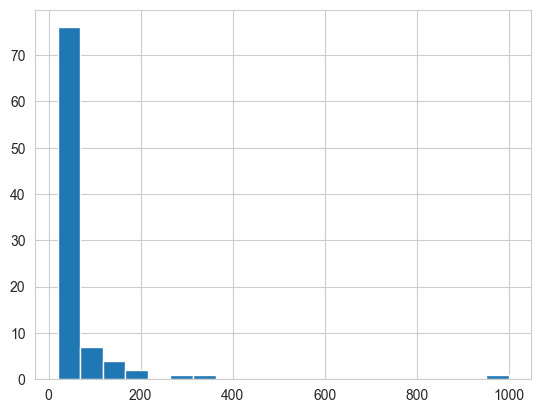

In [72]:
# построим график распределения кодичества заказов
data_grouped_by_product['quantity'].hist(bins = 20, range=(20, 1000));

Мы видим, что присутствуют выбросы начания с количества в 250 заказаов. Посмотрим на товары.

In [73]:
# отобразим эти товары
more_than_250_pieces_was_bought = data_grouped_by_product.loc[data_grouped_by_product['quantity']>250]
more_than_250_pieces_was_bought

date                           customer_id  order_id  \
5456 2019-06-18 15:00:00  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   
5071 2019-06-11 07:00:00  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   
3961 2019-05-20 21:00:00  5d189e88-d4d6-4eac-ab43-fa65a3c4d106     71478   

                                                product  quantity  price  
5456  вантуз с деревянной ручкой d14 см красный burs...      1000 675.00  
5071   вешалки мягкие для деликатных вещей 3 шт шоколад       334 148.00  
3961                          муляж яблоко 9 см красное       300  51.00

Посмотрим являются ли заказы по этим таварам адекватными с жизненной точки зрения

In [74]:
# напишием цикл для отображения заказов по товарам
for product in more_than_250_pieces_was_bought['product']:
    filtered_data = data.loc[data['product'] == product]
    display(filtered_data)

date                           customer_id  order_id  \
5456 2019-06-18 15:00:00  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   

                                                product  quantity  price  
5456  вантуз с деревянной ручкой d14 см красный burs...      1000 675.00

date                           customer_id  order_id  \
5071 2019-06-11 07:00:00  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   
5223 2019-06-13 11:00:00  bc507650-4585-400d-874e-078d5bf3b36e     71694   

                                               product  quantity  price  
5071  вешалки мягкие для деликатных вещей 3 шт шоколад       334 148.00  
5223  вешалки мягкие для деликатных вещей 3 шт шоколад         1 164.00

date                           customer_id  order_id  \
541  2018-10-30 23:00:00  9804e44f-bf1d-4b3a-992f-e2a575b43b7d     68806   
568  2018-11-01 08:00:00  aa42dc38-780f-4b50-9a65-83b6fa64e766     68815   
586  2018-11-02 11:00:00  0c5aaa88-e346-4f87-8f7a-ad8cbc04e965     68831   
839  2018-11-17 01:00:00  2c2b3410-8218-4671-a208-4d20ed55056a     69028   
3961 2019-05-20 21:00:00  5d189e88-d4d6-4eac-ab43-fa65a3c4d106     71478   
6675 2019-10-22 12:00:00  a0364684-750b-4162-9d19-9ad371a240df     73057   

                        product  quantity  price  
541   муляж яблоко 9 см красное         4  59.00  
568   муляж яблоко 9 см красное       170  51.00  
586   муляж яблоко 9 см красное       140  59.00  
839   муляж яблоко 9 см красное         1  59.00  
3961  муляж яблоко 9 см красное       300  51.00  
6675  муляж яблоко 9 см красное         3  59.00

99-й перцентиль кол-ва товара в заказе: 26 


'Количество строк с аномальными значениями: 56 строк'

'Доля аномальных значений от общего количества записей: 1.0%'

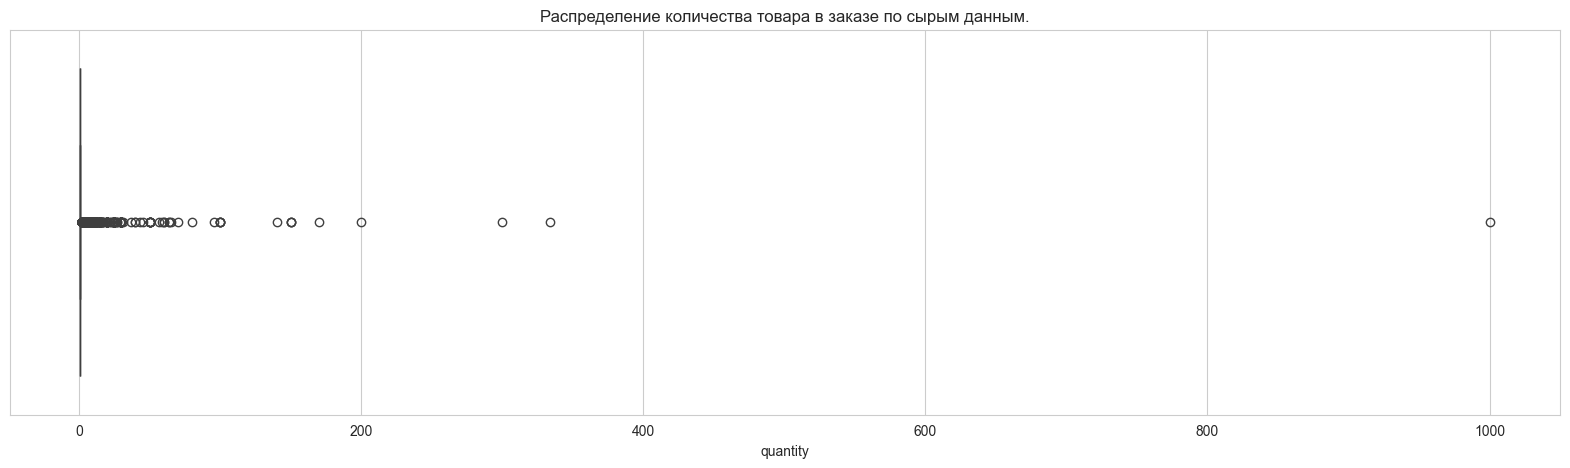

count                           mean                  min  \
date        5522  2019-05-05 05:12:55.805867264  2018-10-01 00:00:00   
order_id 5522.00                       55927.06             12624.00   
quantity 5522.00                           2.58                 1.00   
price    5522.00                         531.58                 9.00   

                          25%                  50%                  75%  \
date      2019-01-29 01:45:00  2019-04-28 15:00:00  2019-07-29 05:15:00   
order_id             14808.00             69188.50             71940.50   
quantity                 1.00                 1.00                 1.00   
price                   90.00               150.00               524.00   

                          max      std  
date      2020-01-31 15:00:00      NaN  
order_id            112789.00 32502.05  
quantity              1000.00    16.51  
price                14917.00   975.26

In [75]:
# граница аномальных значений в кол-ве товара в заказе
upper_limit_quantity = data['quantity'].quantile(.99) 
print('99-й перцентиль кол-ва товара в заказе: {:.0f} '.format(upper_limit_quantity))



# кол-во аномальных значений в столбце 'quantity'
abnormalnumber_q = data[data['quantity'] > upper_limit_quantity]['quantity'].count()
display('Количество строк с аномальными значениями: {} строк'.format(abnormalnumber_q))
display('Доля аномальных значений от общего количества записей: {:.1%}'.format(abnormalnumber_q / len(data))) 

plt.figure(figsize=(20,5))
sns.boxplot(x='quantity', data=data) # построим график боксплот
plt.title('Распределение количества товара в заказе по сырым данным.', fontsize=12)
plt.show()

data.describe().T # выведем статистику о датасете методом describe()

**Наблюдение:** рассмотренные товары с аномальным количеством закзаов при детальном рассмотрении являются нормальными: их покупали как в одном экземпляре, так и оптом разные покупатели в разные промежутки времени. Поэтому удалять их из датасепта нецелесообразно.

#### Добавление нужных столбцов.

In [76]:
# добавим столбец с выручкой c заказа.
data['revenue'] = data['quantity'] * data['price']

In [77]:
data['date'] = pd.to_datetime(data['date'])

In [78]:
# выделим в отдельные столбцы время, день, неделю, месяц и год, а также полную дату.
data['day'] = (data.date.dt.dayofweek) + 1 
data['week'] = data['date'].dt.isocalendar().week
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year
data['date'] = data.date.dt.date

Создадим отдельный столбец будни/выходные с бинарными значениями, где 1 = да, а 0 = нет. 

In [79]:
# напишем функцию sensor_weekdays, принимающую номер дня от 1 до 5 и возвращающую будни, где 1 = да, 0 = нет.
def weekdays(day):
    if  1 <= day <= 5:
        return 1
    else:
        return 0
    
# функция sensor_weekends, принимающяя номер дня от 6 до 7 и возвращающую выходные, где 1 = да, 0 = нет.
def weekends(day):
    if  6 <= day <= 7:
        return 1
    else:
        return 0

In [80]:
# создадим отдельные столбецы будни/выходные в зависимости от дня
data['weekdays'] = data['day'].apply(weekdays)
data['weekends'] = data['day'].apply(weekends)
display(data.shape)
data.sample(10) 

(5522, 13)

date                           customer_id  order_id  \
6922  2019-11-25  a83b36dd-1906-4e1f-8387-5c38fcf76a10    110443   
2265  2019-03-10  c0f3c95e-cc2c-4a0c-8626-f11f2b74d62f     14568   
4963  2019-06-09  0ced9736-060c-47f7-b416-7f97a9945713     14838   
5973  2019-07-27  4d9af62e-7f3b-40a7-9a07-bb547e6892dc     14910   
7203  2019-12-31  722891c0-7dfa-4f88-95ba-ca6411032efd    104268   
5864  2019-07-15  3bdb4f3e-3fb4-4566-ad5f-2f08578237dd     71984   
4063  2019-05-28  930a0f9a-c7e5-482a-9079-311233ae3678     14822   
3213  2019-04-27  d3b9ffea-d143-4747-8d59-74ab843d1ad6     14698   
2923  2019-04-16  d4f984b6-ea59-4618-a26f-79a053e483c7     14653   
533   2018-10-30  e4ad0712-c5fd-4daf-8adf-bd44cde476af     68801   

                                                product  quantity   price  \
6922              чехол для одежды eva 150x65 см mhe017         1  247.00   
2265  пеларгония зональная диам. 12 см розовая полум...         1  188.00   
4963  пеларгония зональная диам. 12 см розовая с мал...         1  188.00   
5973  пеларгония розебудная prins nikolai укорененны...         1  135.00   
7203  фуксия swingtime белая с красным чашелистом об...         1  112.00   
5864  тележка багажная delta тбр-20 синий грузоподъе...         1  734.00   
4063  пеларгония зональная диам. 12 см сиреневый пол...         2  188.00   
3213  томата (помидор) графити № 40 сорт индетермина...         1   38.00   
2923  томата (помидор) моравское чудо №54 сорт индет...         1   38.00   
533           стремянка бытовая framar slimmy 3 ступени         1 1574.00   

      revenue  day  week  month  year  weekdays  weekends  
6922   247.00    1    48     11  2019         1         0  
2265   188.00    7    10      3  2019         0         1  
4963   188.00    7    23      6  2019         0         1  
5973   135.00    6    30      7  2019         0         1  
7203   112.00    2     1     12  2019         1         0  
5864   734.00    1    29      7  2019         1         0  
4063   376.00    2    22      5  2019         1         0  
3213    38.00    6    17      4  2019         0         1  
2923    38.00    2    16      4  2019         1         0  
533   1574.00    2    44     10  2018         1         0

###  Выводы по результатам шага

 - В процессе анализа данных были обнаружены следующие проблемы: некорректный формат даты, различия в регистре букв в столбце с наименованием товара, выбросы в количестве и цене товара.
 - В процессе предварительной обработки данных были приняты следующие решения: приведение даты к правильному формату, приведение наименования товара к нижнему регистру и замена символа "ё" на "е". Также были обнаружены неполные дубликаты в столбцах с наименованием товара и идентификатором заказа. Учитывая, что доля дубликатов составляет 25% от общего количества записей, было принято решение удалить их. Возможно, это было вызвано ошибками при выгрузке или записи данных.
 - Рассмотренные товары с аномальным количеством заказов при детальном рассмотрении являются нормальными: их покупали как в одном экземпляре, так и оптом разные покупатели в разные промежутки времени. Поэтому удалять их из датасепта нецелесообразно
 - Добавлены необходимые столбцы для последующего исследования. 

Теперь данные готовы для проведения анализа.


## Исследовательский анализ данных

### Анализ периода, за который совершались покупки. Поиск аномалий и закономерностей в датах заказов

In [81]:
# Найдем минимальную и максимальную дату.
min_datetime = data['date'].min()
max_datetime = data['date'].max()

display("Первая запись {}".format(min_datetime))
display("Последняя запись {}".format(max_datetime))
display("Период: {} ".format(max_datetime - min_datetime))

'Первая запись 2018-10-01'

'Последняя запись 2020-01-31'

'Период: 487 days, 0:00:00 '

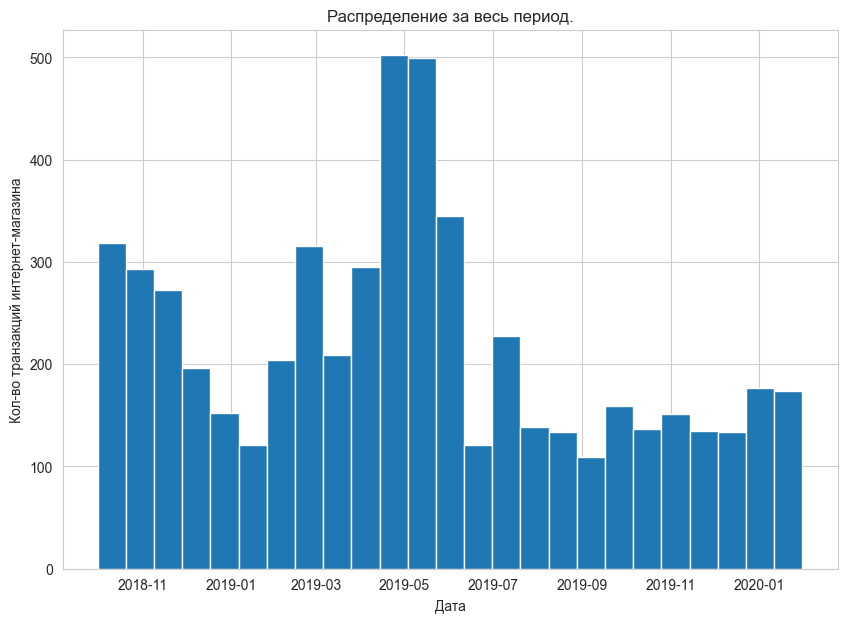

In [82]:
# Построим гистограмму по дате и времени.
plt.figure(figsize=(10,7)) 
plt.title('Распределение за весь период.', fontsize=12)
data['date'].hist(bins=25, grid=True)
plt.xticks(rotation=0)
plt.xlabel('Дата')
plt.ylabel('Кол-во транзакций интернет-магазина')
plt.show()

Мы располагаем данными с 2018-10-01 по 2020-01-31, это 487 дней. С апреля 2019 года виден рост по кол-ву покупок. Пик приходиться на июнь 2019 года. Наблюдается небольшая сезонность по продажам.

### Анализ активности покупателей(количества заказов): поиск аномалий, анализ распределения по времени, построение графика

Для начала поищем аномальных покупателей с аномальным количеством заказов, если такие найдутся, необходимо будет их удалить. Затем посмотрим на активность покупателей в интернет магазине.

In [83]:
# посчитаем общее кол-во покупателей.
customers_total = len(data['customer_id'].unique())
display("Всего покупателей за весь период: {} человек".format(customers_total))

'Всего покупателей за весь период: 2413 человек'

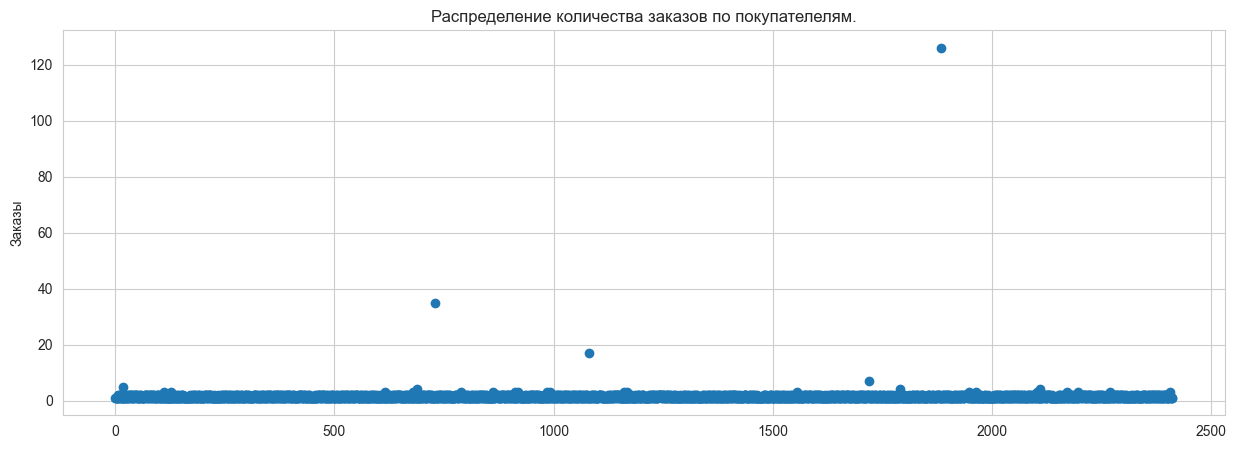

customer_id  orders
1885  c971fb21-d54c-4134-938f-16b62ee86d3b     126
730   4d93d3f6-8b24-403b-a74b-f5173e40d7db      35
1080  73d1cd35-5e5f-4629-8cf2-3fda829d4e58      17
1719  b7b865ab-0735-407f-8d0c-31f74d2806cc       7
17    0184f535-b60a-4914-a982-231e3f615206       5
...                                    ...     ...
977   69cf691b-a6c2-4543-aa8a-8cf42fe4a76e       1
976   69c524f1-dd2a-4c4e-a5b0-def54dc96f9e       1
975   69b17a52-a59b-4656-8d47-375e81e7d5f1       1
974   69897438-1f6c-42f3-8876-ec7f0296072d       1
2412  ffe82299-3f5b-4214-87fe-3d36ecccfac3       1

[2413 rows x 2 columns]

In [84]:
# подсчитаем количество заказов по покупателелям и посмотрим на результат.
orders_by_customer = data.groupby('customer_id', as_index=False).agg({'order_id':'nunique'})
orders_by_customer.columns = ['customer_id','orders']

# построим точечный график количества заказов по пользователям.
# серия из чисел от 0 до количества наблюдений в orders_per_customer.
x_values = pd.Series(range(0,len(orders_by_customer)))

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders_by_customer['orders'])   
plt.ylabel('Заказы')
plt.title('Распределение количества заказов по покупателелям.', fontsize=12)
plt.show()
orders_by_customer.sort_values(by='orders',ascending=False)

Большинство покупателей совершило всего 1 заказ. Клиентов заказавших 3 заказа совсем мало. Также есть пользователи, которые совершали 4, 7, 17, 35 и 126 заказов, что кажется очень странным. Они в полне могут быть аномальными.

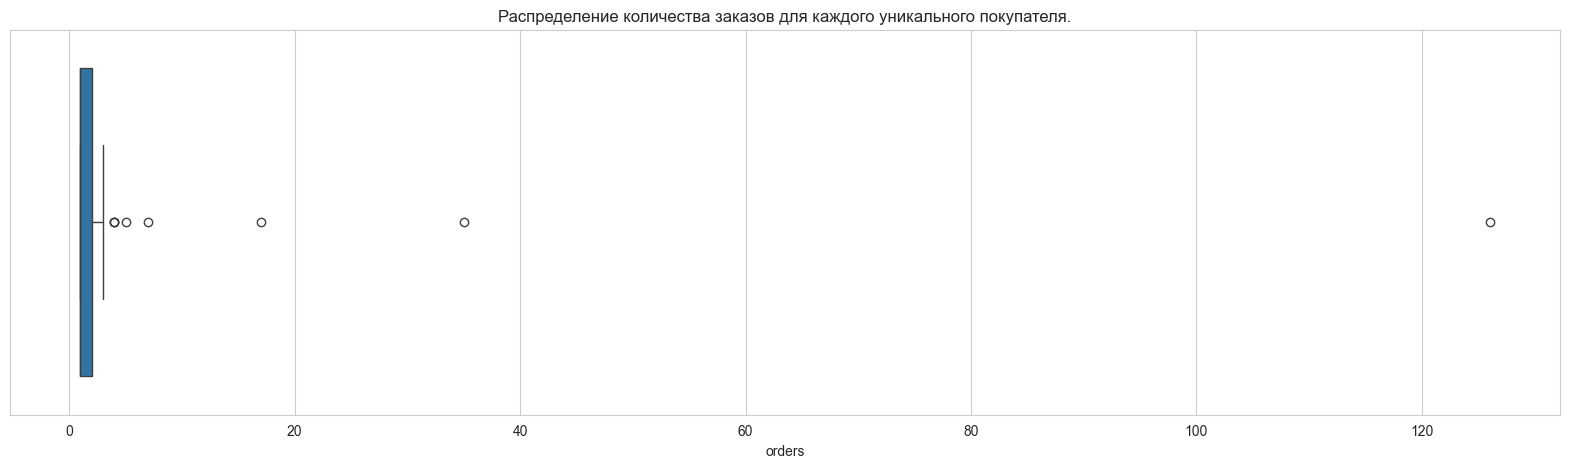

In [85]:
# построим график боксплот распределения заказов для каждого уникального покупателя.
plt.figure(figsize=(20,5))
sns.boxplot(x='orders', data=orders_by_customer)
plt.title('Распределение количества заказов для каждого уникального покупателя.', fontsize=12)
plt.show()

In [86]:
# посчитаем 95-й и 99-й выборочные перцентили количества заказов по покупателелям методом np.percentile()
percentiles = np.percentile(orders_by_customer['orders'], [95, 99])
display('95-й перцентиль количества заказов на покупателя: {} заказа'.format(percentiles[0]))
display('99-й перцентиль количества заказов на покупателя: {} заказа'.format(percentiles[1]))

'95-й перцентиль количества заказов на покупателя: 2.0 заказа'

'99-й перцентиль количества заказов на покупателя: 3.0 заказа'

Не более 5% клиента совершили больше 2 заказов. И не более 1% клиентов – больше 3 заказов. Разумно выбрать 3 заказа на одного клиента за нижнюю границу числа заказов, и отсеять аномальных клиентов по ней.

In [87]:
# узнаем, сколько всего аномальных покупателей
notnormal_customers = pd.concat([orders_by_customer[orders_by_customer['orders']>3]['customer_id']], axis = 0)
display('Количество аномальных покупателей: {} человек'.format(len(notnormal_customers)))

'Количество аномальных покупателей: 8 человек'

In [88]:
# отсеем аномальных пользователей.
data = data.query('customer_id not in @notnormal_customers')

# посчитаем общее кол-во покупателей после фильтрации. 
customers = len(data['customer_id'].unique())
display("Всего покупателей за весь период после фильтрации: {} человек".format(customers))

'Всего покупателей за весь период после фильтрации: 2405 человек'

Посмотрим на активность покупателей

Рассчитаем три метрики:
 - DAU — количество уникальных покупателей в день;
 - WAU — количество уникальных покупателей в неделю;
 - MAU — количество уникальных покупателей в месяц.
 
Сгруппируем данные по уникальным покупателям и найдём среднее. Затем построим графики по изменению метрик во времени.

In [89]:
# посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее.
dau = data.groupby('date').agg({'customer_id': 'nunique'}).mean()
wau = data.groupby(['year', 'week']).agg({'customer_id': 'nunique'}).mean()
mau = data.groupby(['year', 'month']).agg({'customer_id': 'nunique'}).mean()

display('Среднее кол-во уникальных покупателей за день: {} человек'.format(int(dau)))
display('Среднее кол-во уникальных покупателей за неделю: {} человек'.format(int(wau)))
display('Среднее кол-во уникальных покупателей за месяц: {} человек'.format(int(mau)))

'Среднее кол-во уникальных покупателей за день: 6 человек'

'Среднее кол-во уникальных покупателей за неделю: 45 человек'

'Среднее кол-во уникальных покупателей за месяц: 197 человек'

In [90]:
# также можно посчитать регулярность пользования интернет-магазином.
scope_wau = (dau / wau) * 100
scope_mau = (dau / mau) * 100
display('Недельная аудитория: {}'.format(scope_wau[0]))
display('Месячная аудитория: {}'.format(scope_mau[0]))

'Недельная аудитория: 14.64253779780952'

'Месячная аудитория: 3.3818172288177797'

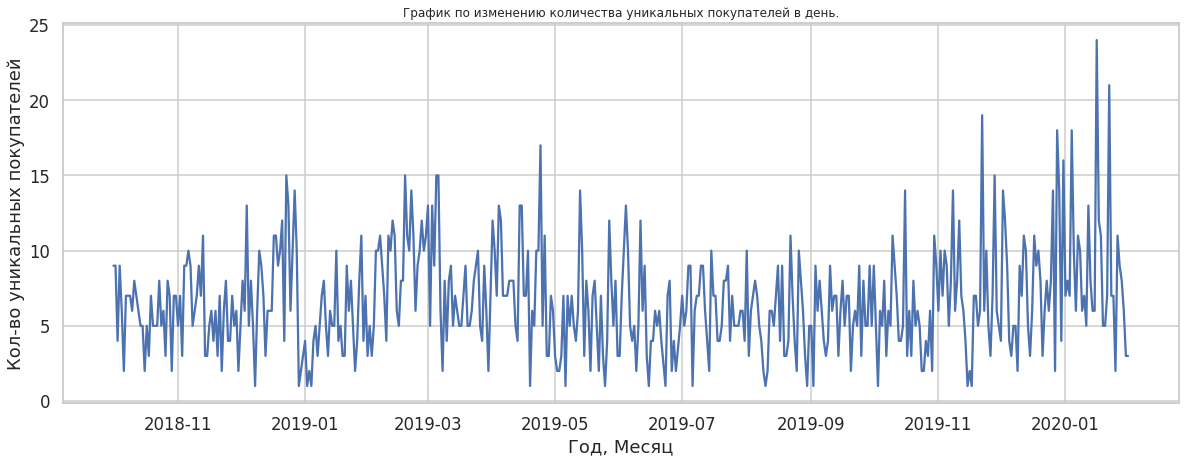

In [106]:
# график по изменению DAW во времени.
data.groupby(['date']).agg({'customer_id': 'nunique'}) \
         .plot(figsize=(20,7), grid=True, legend=False)
plt.title('График по изменению количества уникальных покупателей в день.', fontsize=12)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во уникальных покупателей')
plt.show()

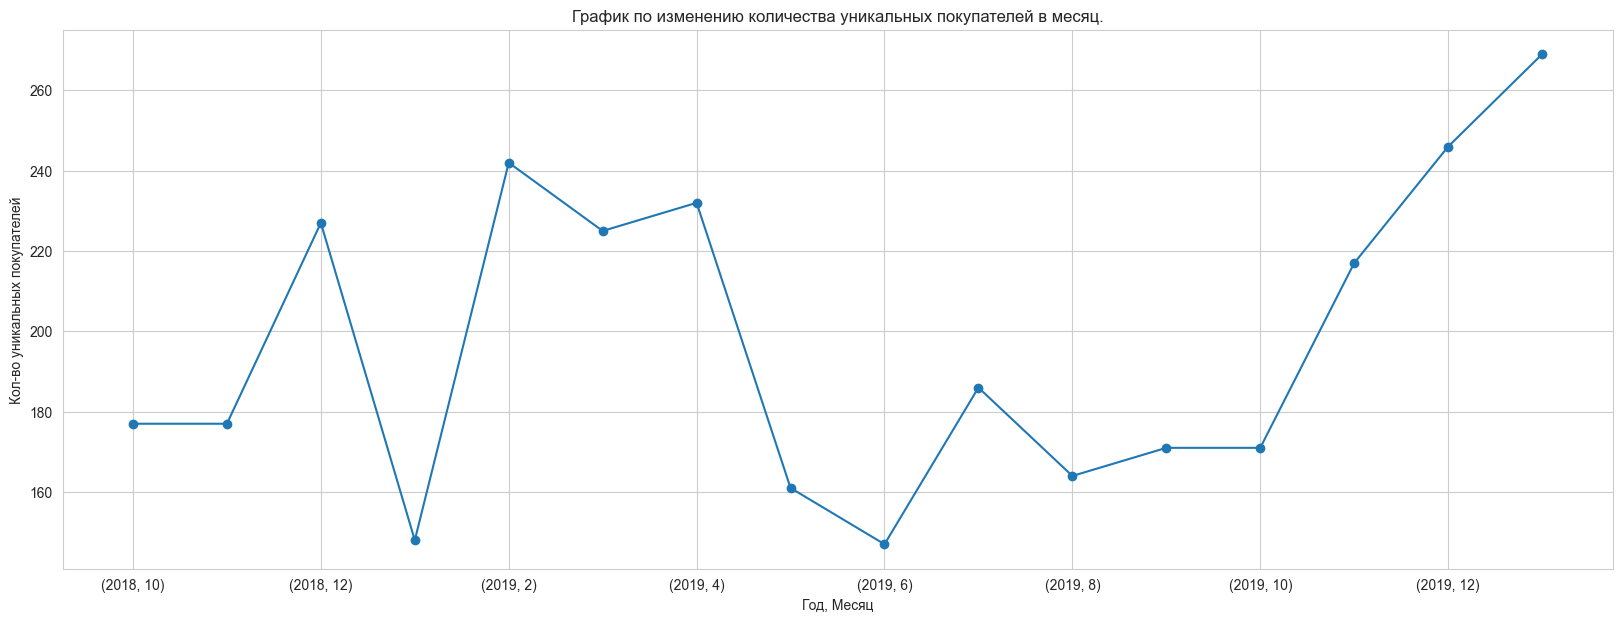

In [91]:
# график по изменению MAU во времени.
data.groupby(['year', 'month']).agg({'customer_id': 'nunique'}) \
      .plot(marker='o', figsize=(20,7), grid=True, legend=False)
plt.title('График по изменению количества уникальных покупателей в месяц.', fontsize=12)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во уникальных покупателей')
plt.show()

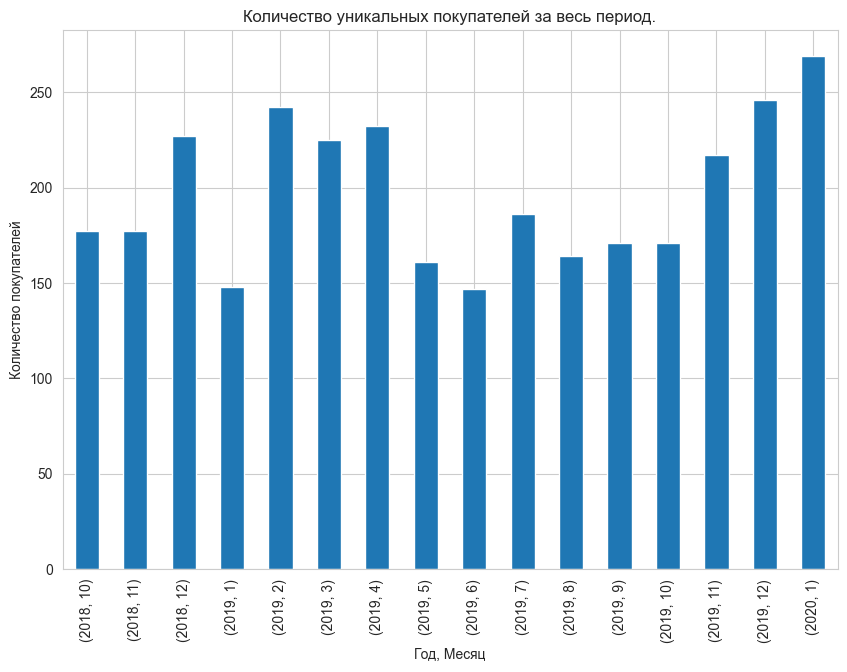

In [92]:
# построим график количества уникальных покупателй за весь период
customers_per_month = data.pivot_table(index=['year', 'month'], values='customer_id', aggfunc='nunique')
customers_per_month.columns = ['customers']
customers_per_month.plot(kind='bar', figsize=(10, 7), grid=True, y='customers', legend=False)
plt.title('Количество уникальных покупателей за весь период.', fontsize=12)
plt.xlabel('Год, Месяц')
plt.ylabel('Количество покупателей')
plt.show()

Наблюдения по «очищенным данным»: 
 - Всего покупателей в датасете 2403 человек, большинство покупателей совершило всего 1 заказ.
 - В основном совершают 1 или 2 заказа.
 - Среднее кол-во уникальных покупателей за день: 6 человек.
 - Среднее кол-во уникальных покупателей за неделю: 45 человек.
 - Среднее кол-во уникальных покупателей за месяц: 197 человек.
 - Недельная аудитория: 14.62%
 - Месячная аудитория: 3.37%

Среднее кол-во уникальных покупателей за месяц 196 человек. 
Наблюдаются периоды активности с февраля 2019 по апрель 2019 виден. Заметно снижение активности с апреля до конца июня 2019 года. В июле 2019 виден небольшой рост по кол-ву уникальных покупателей. Активность покупателей также проявляется в конце 2019 и начале 2020 года.

### Анализ выручки c заказов

Проанализируем на выручку c заказов. Какие товары интернет-магазина приносят наибольшую прибыль. Как меняется эта метрика с течением времени.

In [93]:
# найдем общую сумму выручки
revenue_sum = data['revenue'].sum()
display('Сумма выручки: {:.2f} у.e.'.format(revenue_sum))

'Сумма выручки: 4294974.42 у.e.'

In [94]:
# найдем среднюю выручку с покупателя
revenue_per_customer = data.groupby('customer_id')['revenue'].sum()
revenue_mean = revenue_per_customer.mean()
display('Cредняя выручка с покупателя: {:.2f} у.е.'.format(revenue_mean))

'Cредняя выручка с покупателя: 1785.85 у.е.'

#### Распределение выручки по периодам

Для отображения однотипных графиков по разным временным промежуткам удобно использовать цикл

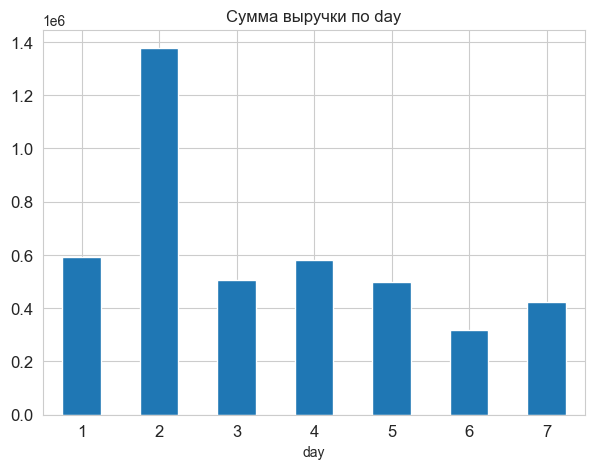

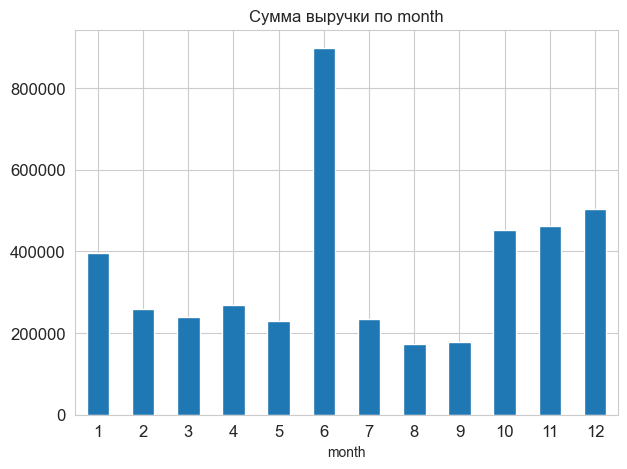

In [95]:
# создадим цикл для построения графиков распределния выручки по промежутам времени
for columns in ['day', 'month']:
    data.pivot_table(index=columns, values='revenue', aggfunc='sum', fill_value=0)\
    .plot(kind='bar', figsize=(7,5), grid=True, y=['revenue'], fontsize=12, legend=False)
    plt.title('Сумма выручки по ' + columns, fontsize=12)
    plt.xticks(rotation=0)
    plt.show()

revenue  avg_revenue
year month                       
2019 6     897922.00      3265.17
2018 11    334367.00       844.36
     12    301928.00      1148.02
2019 4     268347.00       424.60
2018 10    265645.00       646.34
2019 2     259717.00       796.68
     3     240208.00       609.66
     7     234932.00       752.99
     5     228775.00       320.41
     1     221289.00      1257.32
     12    202885.33       824.74
     10    186080.00       930.40
     9     177951.00       820.05
2020 1     174036.33       646.98
2019 8     172100.00       864.82
     11    128791.75       593.51

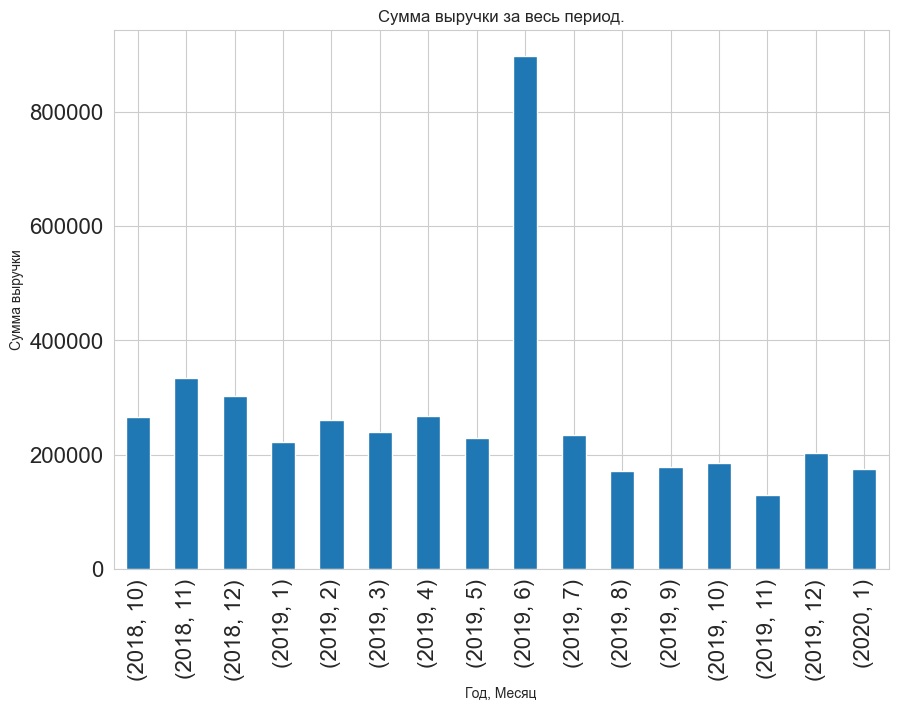

In [96]:
# посчитаем сумму выручки за весь период.
revenue_per_month = data.pivot_table(index=['year','month'],values='revenue',aggfunc=['sum', 'mean'])
revenue_per_month.columns = ['revenue', 'avg_revenue']
display(revenue_per_month.sort_values(by='revenue', ascending=False))

revenue_per_month.plot(kind='bar', y=['revenue'], figsize=(10,7), grid=True, fontsize=16, legend=False)
plt.title('Сумма выручки за весь период.', fontsize=12)
plt.xlabel('Год, Месяц')
plt.ylabel('Cумма выручки')
plt.show()

year  month   revenue  customers  orders  revenue_per_customer  \
8   2019      6 897922.00        147     155               6108.31   
1   2018     11 334367.00        177     184               1889.08   
0   2018     10 265645.00        177     182               1500.82   
3   2019      1 221289.00        148     159               1495.20   
7   2019      5 228775.00        161     170               1420.96   
2   2018     12 301928.00        227     235               1330.08   
9   2019      7 234932.00        186     198               1263.08   
6   2019      4 268347.00        232     254               1156.67   
5   2019      3 240208.00        225     233               1067.59   
4   2019      2 259717.00        242     255               1073.21   
12  2019     10 186080.00        171     184               1088.19   
10  2019      8 172100.00        164     172               1049.39   
11  2019      9 177951.00        171     179               1040.65   
14  2019     12 202885.33        246     246                824.74   
15  2020      1 174036.33        269     269                646.98   
13  2019     11 128791.75        217     217                593.51   

    revenue_per_order  
8             5793.05  
1             1817.21  
0             1459.59  
3             1391.75  
7             1345.74  
2             1284.80  
9             1186.53  
6             1056.48  
5             1030.94  
4             1018.50  
12            1011.30  
10            1000.58  
11             994.14  
14             824.74  
15             646.98  
13             593.51

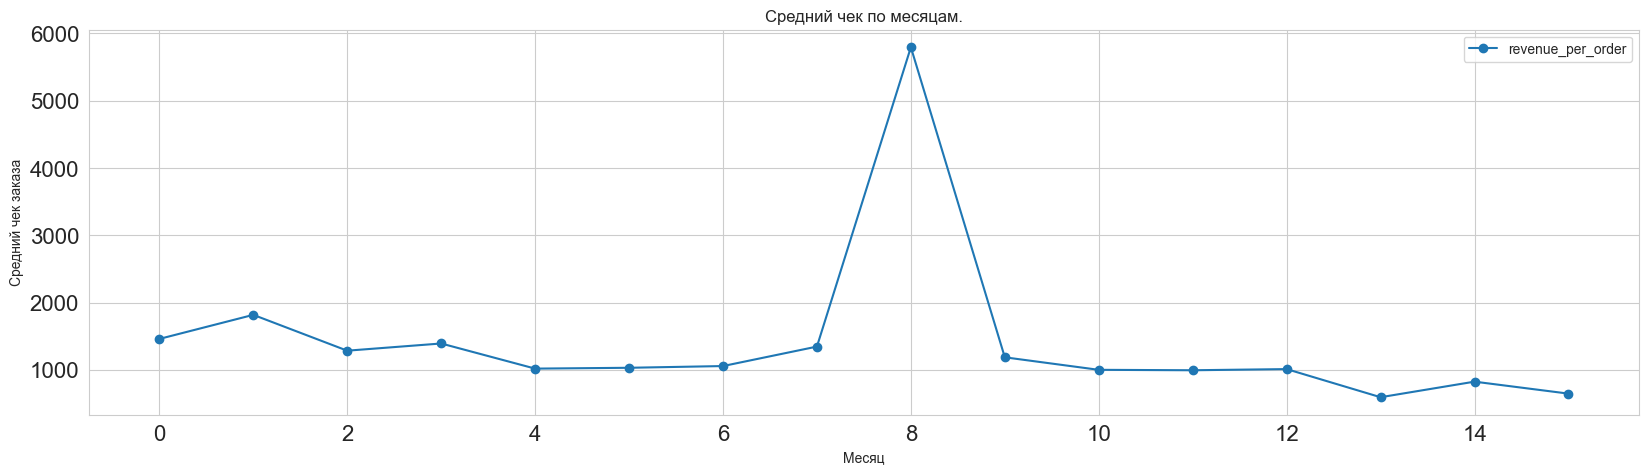

In [97]:
# найдём средний чек покупателя revenue_per_customer — разделим показатель revenue на customer_id.
avg_check = data.groupby(['year','month']) \
                                    .agg({'revenue':'sum','customer_id':'nunique', 'order_id':'nunique'}).reset_index()
avg_check.columns = ['year', 'month', 'revenue', 'customers', 'orders'] # переименуем столбцы 
avg_check['revenue_per_customer'] = avg_check['revenue'] / avg_check['customers']

# найдём средний чек заказов revenue_per_order — разделим показатель revenue на orders.
avg_check['revenue_per_order'] = avg_check['revenue'] / avg_check['orders']

display(avg_check.sort_values(by='revenue_per_order',ascending=False))

avg_check.plot(marker='o', y=['revenue_per_order'], figsize=(20,5), grid=True, fontsize=16)
plt.title('Средний чек по месяцам.', fontsize=12)
plt.xlabel('Месяц')
plt.ylabel('Средний чек заказа')
plt.show()

**Наблюдения:**
 - Сумма выручки: 4274205.42 у.e.
 - Cредняя выручка с покупателя: 1784.64 у.e.
 - В течение всего периода 2018-2020 г.г. наблюдается негативная динамика суммарной выручки от продаж. Общая сумма выручки в конце 2019 г. сократилась почти в 1,3 раза, относительно прошлого года.
 - В течение года средний чек по месяцам имеет стабильный негативный тренд

#### Топ товаров приносящих наибольшую прибыль

Найдем какие товары интернет-магазина приносят наибольшую прибыль. Найдем бестселлеры за весь период

product   revenue
0  вантуз с деревянной ручкой d14 см красный burs... 675000.00
1  простынь вафельная 200х180 см wellness rw180-0...  53232.00
2   вешалки мягкие для деликатных вещей 3 шт шоколад  49596.00
3         сумка-тележка 2-х колесная gimi argo синяя  47258.00
4  тележка багажная delta тбр-22 синий грузоподъе...  33992.00

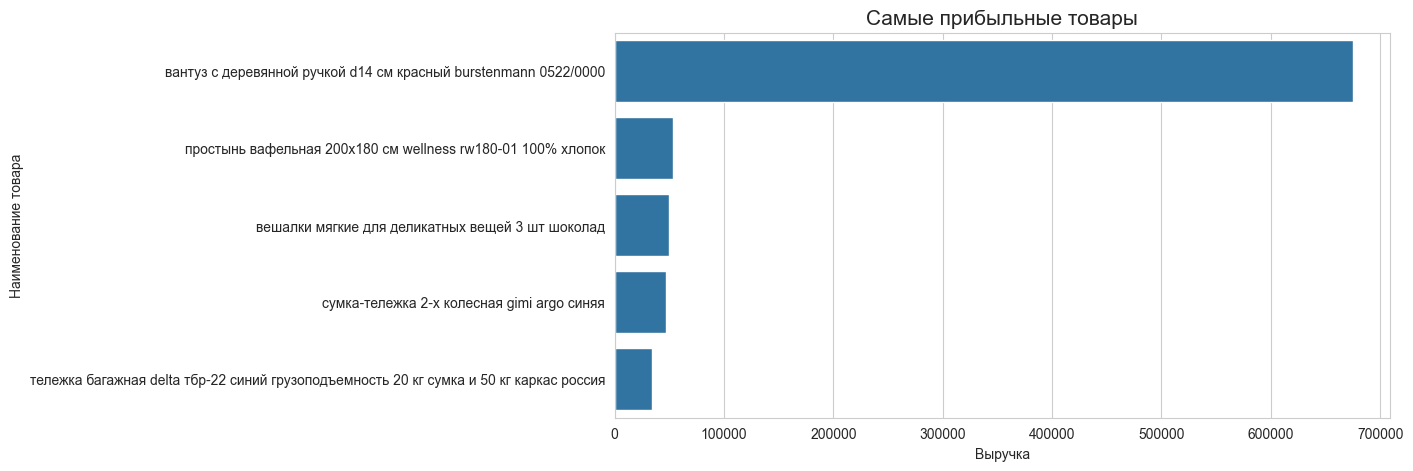

In [98]:
# посмотрим какие товары интернет-магазина приносят наибольшую прибыль.
profit_products = data.pivot_table(index=['product'], values='revenue', aggfunc='sum')\
                               .sort_values(by='revenue', ascending=False).reset_index()
display(profit_products.head())
plt.figure(figsize=(10,5))
plt.title('Самые прибыльные товары', fontsize=15) 
sns.barplot(x='revenue', y='product', data=profit_products[:5]).set(xlabel='Выручка', 
                                                                         ylabel='Наименование товара')
plt.show()

product  quantity
0  вантуз с деревянной ручкой d14 см красный burs...      1000
1                          муляж яблоко 9 см красное       618
2   вешалки мягкие для деликатных вещей 3 шт шоколад       335
3       ручка-скоба рс-100 белая *трибатрон* 1108035       201
4                 крепеж для пружины дверной 1107055       170

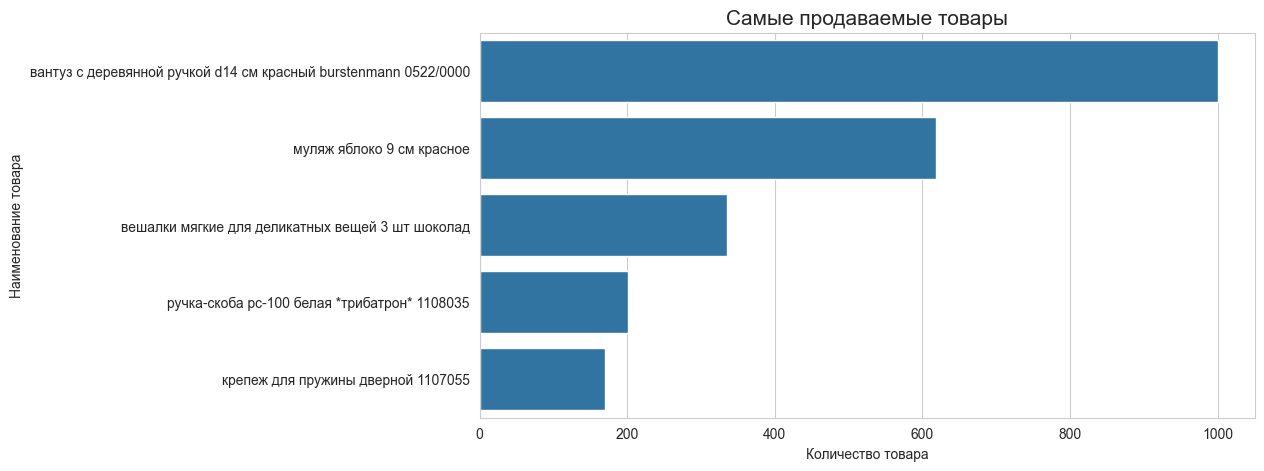

In [99]:
# найдем наиболее продаваемые товары
selled_products = data.pivot_table(index=['product'],\
                                                   values='quantity',\
                                                   aggfunc='sum').sort_values(by='quantity',ascending=False).reset_index()
display(selled_products.head())

plt.figure(figsize=(10,5))
plt.title('Cамые продаваемые товары', fontsize=15)
sns.barplot(x='quantity',y='product',data=selled_products[:5]).set(xlabel='Количество товара', 
                                                                         ylabel='Наименование товара')
plt.show()

**Топ-5 самых прибыльных товара за весь период**  
 - вантуз с деревянной ручкой d14 см красный burstenmann 0522/0000
 - простынь вафельная 200х180 см wellness rw180-01 100% хлопок
 - вешалки мягкие для деликатных вещей 3 шт шоколад
 - сумка-тележка 2-х колесная gimi argo синяя
 - тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия 

**Топ-5 самых продаваемых товаров за весь период**
 - вантуз с деревянной ручкой d14 см красный burstenmann 0522/0000
 - муляж яблоко 9 см красное
 - вешалки мягкие для деликатных вещей 3 шт шоколад
 - ручка-скоба рс-100 белая *трибатрон* 1108035
 - крепеж для пружины дверной 1107055

### Построение матрицы корреляций

Построим матрицу корреляции для выявления коррелирующих признаков в датафрейме 

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5247 entries, 0 to 7473
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5247 non-null   object 
 1   customer_id  5247 non-null   object 
 2   order_id     5247 non-null   int64  
 3   product      5247 non-null   object 
 4   quantity     5247 non-null   int64  
 5   price        5247 non-null   float64
 6   revenue      5247 non-null   float64
 7   day          5247 non-null   int32  
 8   week         5247 non-null   UInt32 
 9   month        5247 non-null   int32  
 10  year         5247 non-null   int32  
 11  weekdays     5247 non-null   int64  
 12  weekends     5247 non-null   int64  
dtypes: UInt32(1), float64(2), int32(3), int64(4), object(3)
memory usage: 497.0+ KB


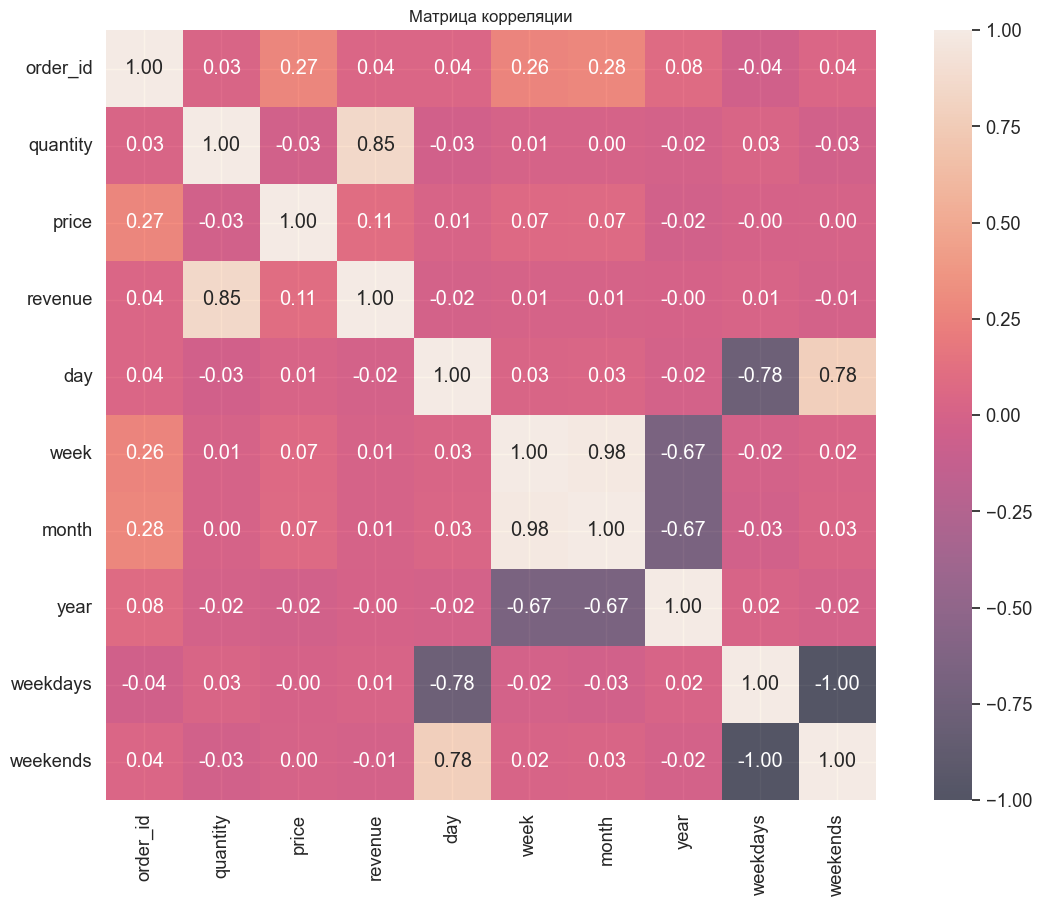

In [102]:
# Построим матрицу корреляций
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.heatmap(data=data.corr(numeric_only=True), annot=True, square=True, alpha=.65, fmt='.2f')
plt.title('Матрица корреляции', fontsize=12)
plt.show()

Наблюдается логическая взаимозависимость между переменными. 
Есть небольшая взаимозависимость выручки с ценой товара, corr = 0,85, то есть чем выше цена товара, тем больше выручка. Также, есть другие переменные, которые положительно коррелируют с выручкой, это количество заказов и товара.

### Выводы по результатам шага

 - У нас есть данные с 1 октября 2018 года по 31 января 2020 года, что составляет 487 дней. С апреля 2019 года мы видим рост числа покупок, достигая пика в июне 2019 года. Также наблюдается некоторая сезонность в продажах.
 - Большинство покупателей сделали всего один заказ, а количество клиентов, сделавших 3 заказа, очень мало. Также есть пользователи, которые сделали 5, 7, 16, 33 и 125 заказов, что кажется странным и может указывать на аномалии.
 - Не более 5% клиентов сделали более 2 заказов, и не более 1% клиентов сделали более 3 заказов. Разумно выбрать 3 заказа как нижнюю границу числа заказов для клиента и исключить аномальных клиентов, которые превышают эту границу.
 - Среднее количество уникальных покупателей в месяц составляет 194 человека, что является небольшим числом. Метрика "липкого фактора" (sticky factor) показывает низкие значения, что означает, что клиенты обращаются в интернет-магазин нечасто.
 - С февраля 2019 года по апрель 2019 года мы видим рост активности покупателей, затем наблюдается снижение активности с апреля до конца июня 2019 года. В июле 2019 года мы видим небольшой рост числа уникальных покупателей. Активность покупателей также проявляется в конце 2019 года и начале 2020 года.
 - Общая сумма выручки составляет 4294974.42 у.е., а средняя выручка с одного покупателя - 1785.85 у.е.
 - За весь период с 2018 по 2020 годы наблюдается негативная динамика суммарной выручки от продаж. Общая сумма выручки в конце 2019 года сократилась почти в 1,3 раза по сравнению с предыдущим годом. Возможной причиной может быть общее ухудшение условий предпринимательской деятельности.
 - Средний чек по месяцам имеет стабильный негативный тренд в течение года.
 - Наблюдается логическая взаимосвязь между переменными. Существует небольшая положительная корреляция между выручкой и ценой товара (corr = 0,85), что означает, что чем выше цена товара, тем больше выручка. Также есть другие переменные, которые положительно коррелируют с выручкой, такие как количество заказов и товара.

## Категоризация и анализ товарного ассортимента

### Категоризация товаров

Начнем категоризацию товаров с поиска стандартных паттернов. Используем для этого метод лемматизации - приведения слов к их базовой форме (лемме), так как он учитывает грамматические правила языка и обеспечивает более точное приведение слов к их корневой форме.

In [103]:
# посмотрим уникальные значения столбца 'product', используя метод unique().
unique_product = data['product'].unique() 

# Выделим леммы в значениях столбца с наименованием товара, которые пригодиться для создания словаря, 
# который будем исползать для категоризации товара.
m = Mystem()
string = '; '.join(unique_product) # сохраним результат в переменной string
lemmas = m.lemmatize(string) # сохраным результат в переменной lemmas
#display(Counter(lemmas)) # посчитаем количество упоминаний, вызовом Counter из модуля collections
#display(unique_product)

Installing mystem to C:\Users\yd7298/.local/bin\mystem.exe from http://download.cdn.yandex.net/mystem/mystem-3.1-win-64bit.zip


Из упомянутых лемм в значениях столбца с 'product', выделю следующие 10 категорий: 
 - хранение 
 - мебель
 - кухня 
 - ванная
 - текстиль 
 - сад/огород
 - уборка
 - инструменты
 - гигиена
 - декор

Создадим словарь с категориями и списком слов из лемм и списка unique_product

In [104]:
# создадим словарь

category_dict = {
    'хранение':['бак','вакуумный','весы','петля','вешалка','вешалки','вкладыши','корзина','короб','коробка','кофр', 
                'крючок','обувная','лоток','мусора','монетчатый','мусорный','набор вешалок','котовник','петля', 
                'сумка','тележ','плечики','полки','решетка','складная','стеллаж','сумка','тележка',
                'хозяйственная','урна','этажерка','ящик'],
    
    'мебель': ['подставка','стеллаж','комод','карниз','этажерка','пуф','обувниц','светиль','фото',
               'для обув','комод','защитный','обувница','обуви','светильник'],
    
    'кухня':['банка','бидон','блюдо','блюдце','ваза','вилка','разделочная','емкость','жестяная','измельчитель',
             'картофелемялка','кастрюля','кипятильник','кисточка','хлебница','интерьерный','кружка',
             'крышка', 'кувшин', 'кухонное','кухонные','столовая','чайная','холодца','мантоварка',
             'пароварка','масленка','мерный','стакан','миксер','мини-сковорода','мирт','миска','модульная', 
             'набор бокалов','набор для пикника','набор ножей','webber','набор стаканов','набор столовых приборов',
             'набор фужеров','фужер','стакан','салатник','нож','ножеточка','овощеварка','овощечистка',
             'подушка','покрывало','просеиватель','противень','разделочная','салатник','салфетка','сковорода',
             'скребок','соковарка','соковыжималка','стакан','стеклянная','тepмокружка','тарелка', 'терка',
             'термокружка','толкушка','фал','форма','хлебница','ложка','чайная','чайник','электроштопор','сито', 
             'подставка для яйца'],
    
    'ванная':['ванна','вантуз','ведро','держатель','дозатор','ерш','запасная','ванной','коврик','ванной', 
              'ковш','мыльница','ванн','подголовник','пробка','унитаза'],
    
    'текстиль':['скатерть','двуспальное','постельное','белье', 'ковер', 'кольца', 'штор', 'полотенце','штора', 
                'ковер', 'махровое','халат','набор ковров', 'наволочка', 'наматрасник', 'одеяло', 'плед', 
                'подкладка', 'чехол','полотенце','простыня','скатерть','халат','чехол','штора',
                'простынь вафельная 200х180 см wellness', 'наматрацник natures бархатный', 'покрывало жаккард шенилл birhome',
                'покрывало жаккард шенилл'],
    
    'cад/огород':['а патио','адиантум','азалия','аквилегия','алиссум','амариллис','альбука','андесса','антижир',
           'арбуз','артемизия','аспарагус','астра','ахарница','бадан','базилик','бак','баклажан',
           'бакопа','бальза','барвинок','бархатцы','бегония','буддлея', 'бузульник', 'валериана', 'вербена',
           'виола', 'газания', 'гвоздика','гардения', 'георгина', 'герань', 'гербера', 'гимнокалициум', 'гиностемма',
           'гипсофила','годеция','горох','гортензия', 'декабрист', 'декоративная','дендробиум', 
           'джункус', 'томата', 'диффенбахия','дыня', 'ель', 'чабер', 'замиокулькас', 'зверобой', 'земляника', 
           'змееголовник', 'импатиенс','иссоп','сантолина', 'кабачок', 'каланхое', 'календула', 'калибрахоа', 
           'калла', 'калоцефалус', 'камнеломка','кампанула', 'капуста', 'кипарисовик', 'клен', 'клубника',
           'колокольчик', 'растение', 'кориандр','космея', 'крассула', 'крокусы','лаванда', 'мята', 'лантана', 
           'лапчатка','лен', 'литопс', 'порей', 'львиный', 'зев','любисток','мединилла','мелисса','многолетнее', 'молодило',
           'петрушка','морковь', 'мята', 'настурция','незабудка','нолина', 'огурец', 'растение','однолетнее', 'осина',
           'орехоколка','патиссон','пахира', 'пеларгония', 'пеларгония', 'петрушка', 'петуни', 'подвесное',
           'цветов','портулак', 'примула', 'пуансеттия','радермахера', 'роза','розмарин','рудбекия','скиммия', 
           'спатифиллум','суккулент','сциндапсус', 'тимьян','томат', 'томата', 'тортница', 'тюльпан', 'рассада', 
           'ранункулус','тыква', 'фаленопсис','фиалка', 'фикус', 'фиттония', 'флокс', 'фуксия', 'хризантема', 
           'целозия', 'цикламен', 'шалфей','эвкалипт','эпипремнум', 'эхеверия', 'эшшольция', 'ясколка', 'шеффлера',
           'хризолидокарпус', 'циперус', 'юкка нитчатая', 'рассада зелени для кухни', 'нефролепис', 'овсянница сизая серый',
           'хлорофитум'],
    
    'уборка':['ароматизиро', 'белье', 'прищепки','веник','гипоаллергенный','гель','гладильная','набор vileda', 
              'набор прищепок','доска','губка','гладильная','защитная','соль','кондиционер','контейнер','стирки', 
              'насадка', 'насадка','швабры','мытья','швабре','сушилка','настенная','настурция','ведра', 
              'пена','перчатки','тряп','швабр','совок','гладил','глажен','прищеп','налет','антижир','пылесос','крем', 
              'стир', 'щетка','сушилк','веник','подрукавник','совком', 'для чистки','стирки','мыть', 'средство',
              'мойк', 'утюг', 'покрытие','гладильной', 'пылесос','гладильной','совок','щетка','средство', 
              'таз','тряпка','корзина','швабра','щетка','средство', 'таз', 'корыто', 'паста для полировки', 
              'вантуз', 'швабр','губка','веник','сменный','дозатор', 'насадка', 'сметка', 'скребок', 'окномойка',
              'совок','чистящий','чистки','антижир','ведр','ерш','тряпка','отбеливатель','для стирки','стиральный',
              'сушилка для белья', 'настенная сушилка для', 'чехол для гладильной доски', 'сушилка для белья',
              'ароматизированное средство дудаления', 'чехол для гладильной доски', 'сушилка для белья', 'attribute', 'gimi',
              'сушилка для белья потолочная лиана люкс', 'сушилка для белья потолочная лиана люкс', 
              'сушилка для белья потолочная zalger lift basic', 'linomatic', 'сушилка уличная', 'leifheit', 
              'сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237'],

    
    'инструменты':['инструмент','сверел','сверло','напильник','стремянк','стяжк','шпингалет','сварка',
                   'миксер','крепеж','пружин','петл','линейк','гои','бензин','завертка','крепеж','лестница',
                   'линейка','лопатка','шнур','строительного','многофункциональный','набор прецизионных','полировки',
                   'пьезозажигалка', 'ручка','сверло','седум','сетка','сметка','стремянка','стяжка','термометр',
                   'уголок','фарфоровая','сварка','шило','шнур','шпагат','штангенциркуль', 'чехол eurogold reflector' ],
    
    'гигиена':['зубная','мыло','жидкое','мыло-скраб','увлажняющая','маска','фен'],
    'декор':['искусственная', 'искусственный', 'декоративная', 'котовник', 'муляж', 'новогоднее', 'подарочный',
            'фоторамка', 'комнатное растение в горшке', 'муляж баклажан' ],
}

In [106]:
# Напишем функцию которая вернет категорию по значению ‘product’.
def cat_product(product):

    for category, items_of_list in category_dict.items():
        for item in items_of_list:
            if item in product:
                return category
    return category

In [107]:
# создаем отдельный столбец с категориями
data['category'] = data['product'].apply(cat_product)
display(data.shape)
data.sample(10)

(5247, 14)

date                           customer_id  order_id  \
3878  2019-05-17  1420716a-02ef-426f-828d-fddcb0e1f532     14786   
7349  2020-01-16  a7985efd-df3d-4040-a832-10291bc631f0    105258   
39    2018-10-02  1bc8ad38-3392-4042-8cde-aa5de306c947     68494   
1354  2018-12-25  19385fc3-fdc2-41dd-8114-aefa73229132     69580   
432   2018-10-26  9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f     68760   
1222  2018-12-16  682f54c9-0ee1-4442-9145-670a2c6f1970     69388   
2521  2019-03-28  e58284ef-20d2-42dd-879d-fdd6bd653f3f     14597   
3694  2019-05-13  6a86cc77-ef15-496f-b5d3-89005597ee5d     14763   
3488  2019-05-09  1809d8b0-c702-450d-a73c-76fc90386411     14742   
2158  2019-03-04  0f47231c-3a68-404a-88f7-08a4a172c17f     14559   

                                                product  quantity   price  \
3878            петуния гибридная ампельная диам. 12 см         1  142.00   
7349  таз пластмассовый строительный прямоугольный 8...         2  524.00   
39                 муляж персики мини полиуретан d-6 см         1   22.00   
1354                        аспарагус спренжери d-12 см         1  194.00   
432        сушилка для белья напольная gimi tempo super         1 2849.00   
1222     новогоднее дерево ель сербская d-21 см h-60 см         1 1049.00   
2521  львиный зев рассада однолетних цветов в кассет...         1  112.00   
3694                петуния ампельная белая в горшке p9         3  128.00   
3488  однолетнее растение петуния махровая в кассете...         3   82.00   
2158  базилик смесь зеленого и фиолетового 04 г 4660...         1   11.00   

      revenue  day  week  month  year  weekdays  weekends    category  
3878   142.00    5    20      5  2019         1         0  cад/огород  
7349  1048.00    4     3      1  2020         1         0  cад/огород  
39      22.00    2    40     10  2018         1         0       декор  
1354   194.00    2    52     12  2018         1         0  cад/огород  
432   2849.00    5    43     10  2018         1         0  cад/огород  
1222  1049.00    7    50     12  2018         0         1  cад/огород  
2521   112.00    4    13      3  2019         1         0  cад/огород  
3694   384.00    1    20      5  2019         1         0  cад/огород  
3488   246.00    4    19      5  2019         1         0  cад/огород  
2158    11.00    1    10      3  2019         1         0  cад/огород

In [108]:
# выведем статистику по категориям товарного ассортимента.
category_data = data.groupby('category').agg({'product':'count'}).reset_index()
category_data.columns = ['category', 'products']
category_data['ratio'] = ((category_data['products'] / len(data))*100).round(1).astype('str')+'%'
display(category_data.sort_values(by='products', ascending = False))

category  products  ratio
0   cад/огород      2877  54.8%
9     хранение       691  13.2%
5        кухня       392   7.5%
3        декор       337   6.4%
8       уборка       327   6.2%
1       ванная       309   5.9%
7     текстиль       179   3.4%
4  инструменты        85   1.6%
6       мебель        33   0.6%
2      гигиена        17   0.3%

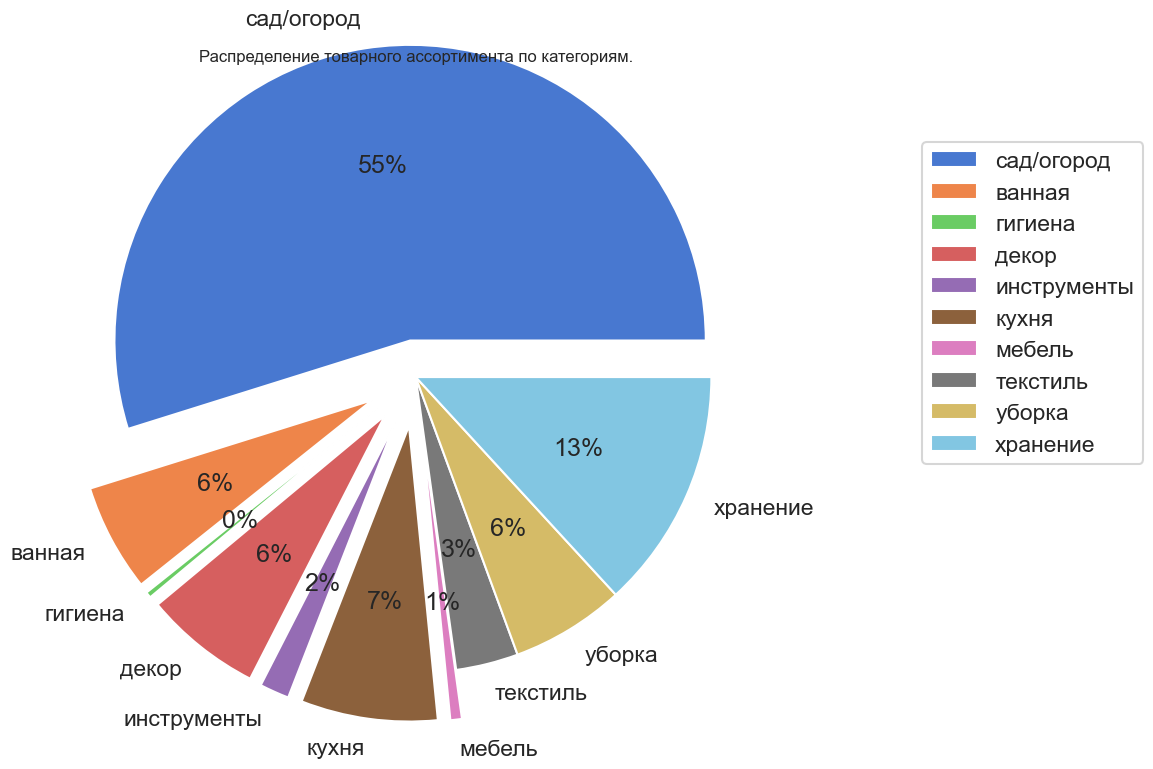

In [109]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('muted')
#groupby_category['category'] = groupby_category.index  # Преобразование индекса в столбец
category_data.plot(kind='pie', y='products', figsize=(8, 8), autopct='%1.0f%%', legend=False, pctdistance=0.6,
                   labels=category_data['category'], labeldistance=1.1, radius=1.2,
                   explode=(0.15, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0, 0, 0)
                   ).set(ylabel='')
plt.title('Распределение товарного ассортимента по категориям.', fontsize=12)
plt.legend(bbox_to_anchor=(1.7, -0.1, 0, 1))
plt.show()

Самую большую долю товарного ассортимента занимает категория «сад/огород» 55% от общего количества товарного ассортимента, можно её назвать основной. В эту категорию вошли все растения, рассада и элементы для дачи и сада. Потом идет категория «хранение» 13%, «кухня» 7%, «декор» 6%, «уборка» 6% и «ванная» 6%.

### Анализ товарного ассортимента

Расчет выручки и количества покупателей по категориям

In [111]:
# сгруппируем данные по категориям.
groupby_category = data.groupby('category').agg({'revenue':'sum', 'date':'max', 'order_id':'nunique',
                                                      'customer_id':'nunique', 'quantity':'sum'})
groupby_category.columns = ['revenue', 'date', 'orders', 'customers', 'quantity'] # переименуем столбцы 

# найдём средний чек покупателя revenue_per_customer — разделим показатель revenue на customers.
groupby_category['revenue_per_customer'] = groupby_category['revenue'] / groupby_category['customers']

# найдём средний чек заказов revenue_per_order — разделим показатель revenue на orders.
groupby_category['revenue_per_order'] = groupby_category['revenue'] / groupby_category['orders']
groupby_category = groupby_category.sort_values(by='revenue', ascending = False)

# найдем соотношение выручки, покупателей, заказов от их общего количества. 
groupby_category['ratio_revenue'] = ((groupby_category['revenue'] / groupby_category['revenue'].sum())* 100)\
                                                                                    .round(1).astype('str')+'%'
groupby_category['ratio_customer']= ((groupby_category['customers'] / groupby_category['customers'].sum())* 100)\
                                                                                     .round(1).astype('str')+'%'
groupby_category['ratio_order']= ((groupby_category['orders'] / groupby_category['orders'].sum())* 100)\
                                                                                     .round(1).astype('str')+'%'
display(groupby_category)

revenue        date  orders  customers  quantity  \
category                                                          
хранение    1216732.25  2020-01-31     639        591      1981   
ванная       996757.50  2020-01-29     291        274      1935   
cад/огород   824609.50  2020-01-31    1298       1128      4591   
уборка       428886.50  2020-01-29     305        290       812   
кухня        284092.00  2020-01-29     342        324      1179   
текстиль     227065.17  2020-01-26     170        161       289   
декор        149694.17  2020-01-27     262        252      1827   
инструменты  126130.33  2020-01-22      80         77       609   
мебель        29852.00  2020-01-31      33         31        59   
гигиена       11155.00  2020-01-05      16         16        46   

             revenue_per_customer  revenue_per_order ratio_revenue  \
category                                                             
хранение                  2058.77            1904.12         28.3%   
ванная                    3637.80            3425.28         23.2%   
cад/огород                 731.04             635.29         19.2%   
уборка                    1478.92            1406.19         10.0%   
кухня                      876.83             830.68          6.6%   
текстиль                  1410.34            1335.68          5.3%   
декор                      594.02             571.35          3.5%   
инструменты               1638.06            1576.63          2.9%   
мебель                     962.97             904.61          0.7%   
гигиена                    697.19             697.19          0.3%   

            ratio_customer ratio_order  
category                                
хранение             18.8%       18.6%  
ванная                8.7%        8.5%  
cад/огород           35.9%       37.8%  
уборка                9.2%        8.9%  
кухня                10.3%       10.0%  
текстиль              5.1%        4.9%  
декор                 8.0%        7.6%  
инструменты           2.4%        2.3%  
мебель                1.0%        1.0%  
гигиена               0.5%        0.5%

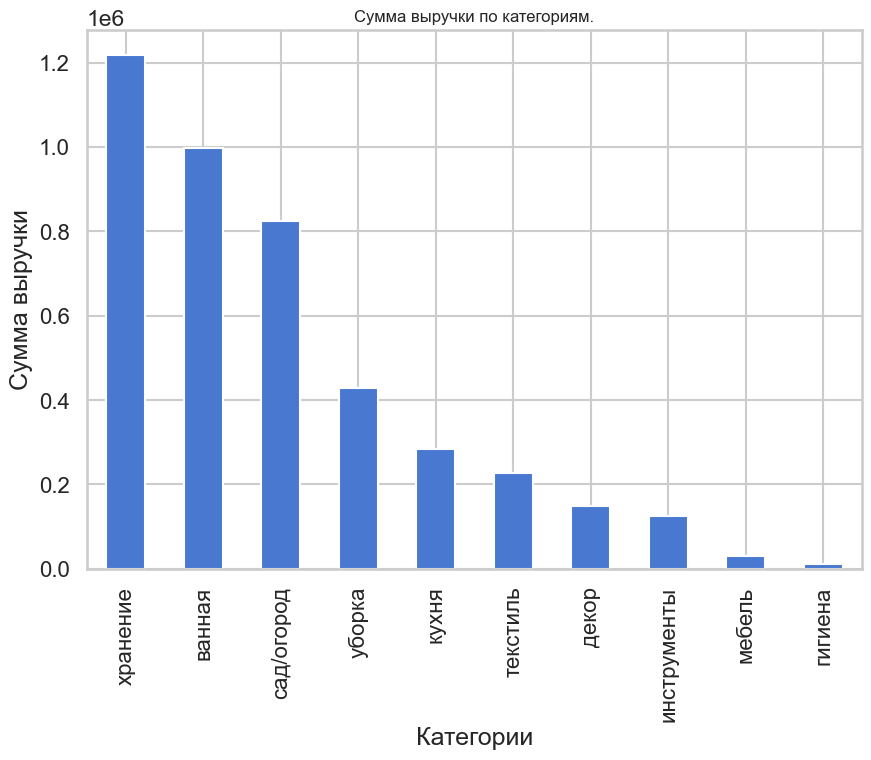

In [112]:
# построим график по сумме выручки по категориям.
sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['revenue'], figsize=(10,7), grid=True, 
                      fontsize=16, legend=False)
plt.title('Сумма выручки по категориям.', fontsize=12)
plt.xlabel('Категории')
plt.ylabel('Cумма выручки')
plt.show()

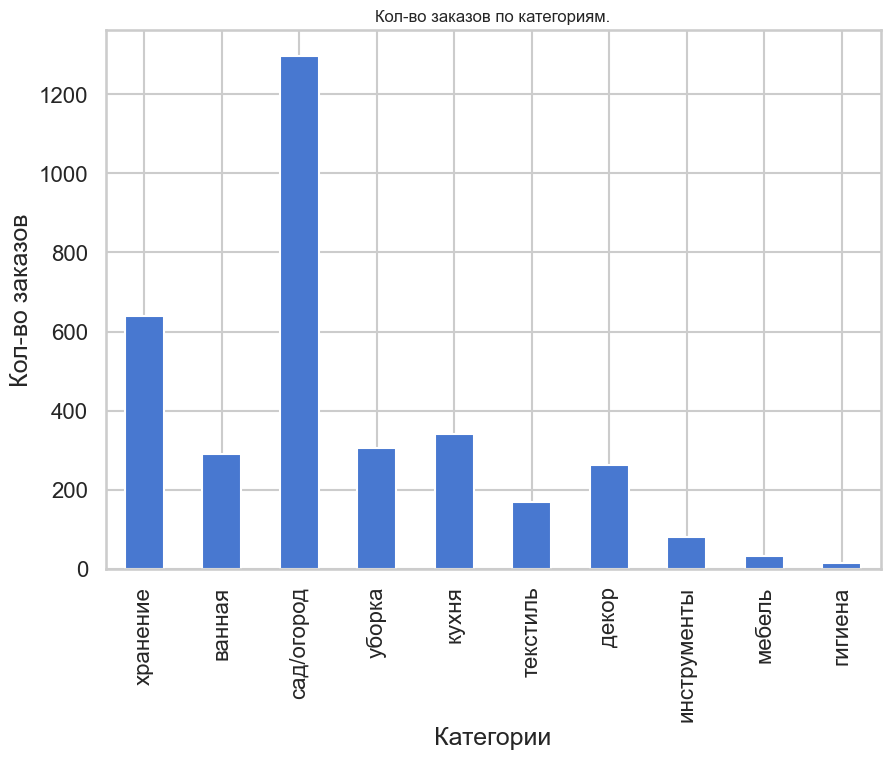

In [113]:
# построим график по кол-ву заказов по категориям.
sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['orders'], figsize=(10,7), grid=True, 
                      fontsize=16, legend=False)
plt.title('Кол-во заказов по категориям.', fontsize=12)
plt.xlabel('Категории')
plt.ylabel('Кол-во заказов')
plt.show()

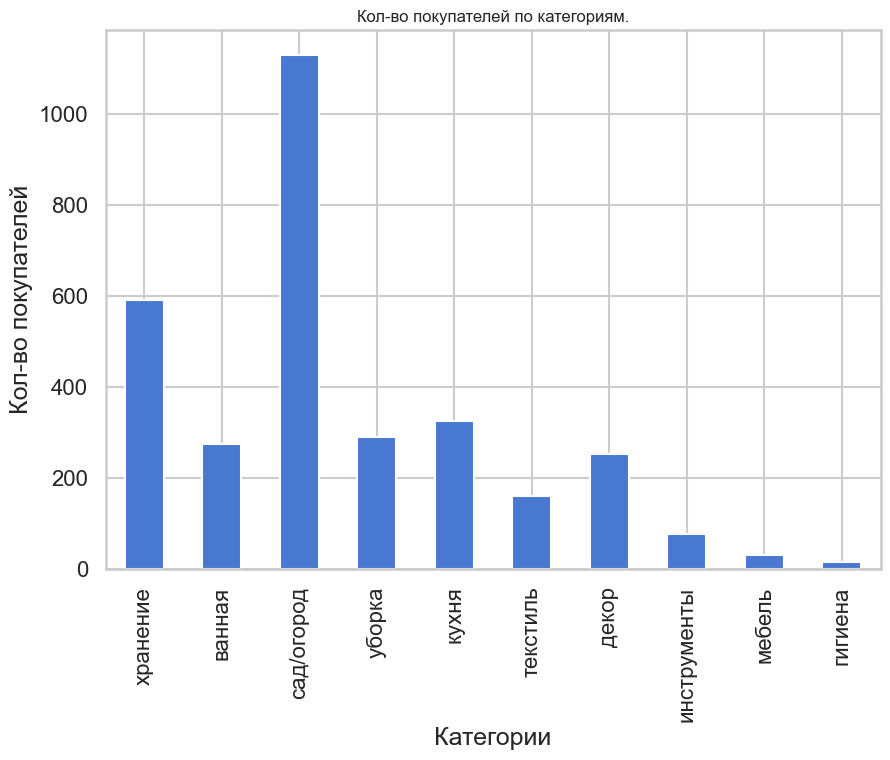

In [114]:
# построим график по кол-ву покупателей по категориям.
sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['customers'], figsize=(10,7), grid=True, 
                      fontsize=16, legend=False)
plt.title('Кол-во покупателей по категориям.', fontsize=12)
plt.xlabel('Категории')
plt.ylabel('Кол-во покупателей')
plt.show()

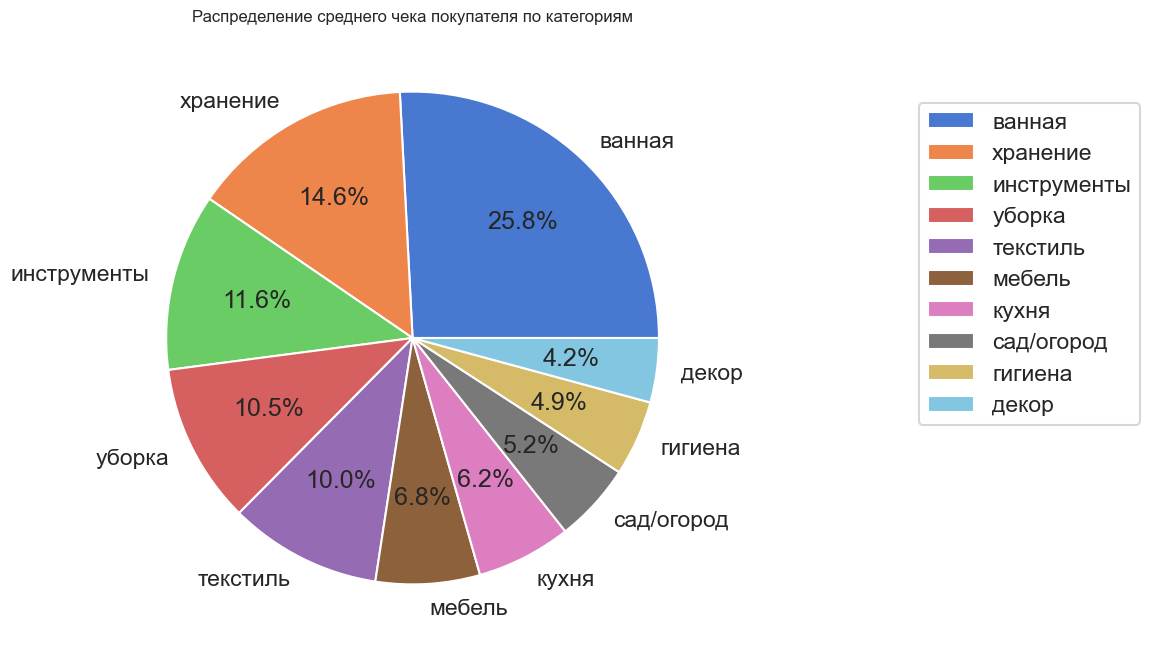

In [115]:
# построим круговую диаграмму распределения среднего чека покупателя по категорям
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('muted')
(groupby_category.sort_values(by='revenue_per_customer', ascending=False)\
                 .plot(kind='pie', y='revenue_per_customer', figsize=(8, 8), autopct='%1.1f%%', pctdistance=0.65).set(ylabel=''))
plt.title('Распределение среднего чека покупателя по категориям', fontsize=12)
plt.legend(bbox_to_anchor=(1.7, -0.1, 0, 1))
plt.show()

- Самая прибыльная категория - "хранение", за ней следует категория "сад/огород". Категория "гигиена" является менее прибыльной.
- По количеству заказов, наиболее продаваемыми товарами являются товары категории "сад/огород", за ними следует категория "хранение" - Это подтверждает, что основной ассортимент товаров состоит из категории "сад/огород", а остальные категории являются дополнительными. 
- По среднему чеку и показателю эффективности продаж категория "сад/огород" показывает наименьшую выручку. Чтобы улучшить этот показатель, рекомендуется предлагать клиентам магазина приобретать сопутствующие товары со скидкой. Также можно работать с ассортиментом и его сортировкой, предлагая позиции, которые дороже среднего чека, и проводить акции и специальные предложения.

Проанализируем продажи по категориям по временам года

In [116]:
# Напишем функцию season, принимающую номер месяца от 1 до 12, 
# и возвращающую время года, которому этот месяц принадлежит (весна, лето, осень или зима).
def season(month):
    if  3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return 'зима'

In [117]:
# создадим отдельный столбец с временами года в зависимости от месяца, 
# и в его ячейках записать значения, возвращаемые функцией.
data['season'] = data['month'].apply(season)
display(data.shape)
data.sample(10)

(5247, 15)

date                           customer_id  order_id  \
1560  2019-01-21  1afdf185-d45b-411b-a5fa-ef893dd39f5a     69905   
5560  2019-06-24  9897ccd6-9441-4886-b709-b06361fabf6c     14873   
2388  2019-03-18  fb117193-682f-44ab-b9fe-e9be18801e36     14580   
714   2018-11-09  2de8bea1-e6fb-4db2-bc5e-3a49679b1f30     68924   
2794  2019-04-11  b26fcce1-ceb7-47c2-b340-8b3385c0fc90     71098   
1050  2018-12-02  1984005d-d793-4c5e-b21f-d2702f60ac4d     69167   
5884  2019-07-17  dbfc50aa-0db8-4c92-9e9d-533fea90e582     72017   
4187  2019-05-31  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
6279  2019-09-08  1efd6836-f19d-4c3c-a69a-eebaa71403fe     72549   
3001  2019-04-22  bfa5c5ea-61c5-4cd8-b257-329981a70ea0     14668   

                                                product  quantity   price  \
1560  разделочная доска attribute granite 20х30 см a...         2  187.00   
5560    петуния sweetunia black satin черная объем 05 л         1   90.00   
2388  пеларгония зональная простая цвет фуксии взрос...         1  150.00   
714   измерительный алюминиевый угольник 20*30 см tr...         1  299.00   
2794  пеларгония зональная мультиблум скарлет ай d-7...         1   74.00   
1050    сушилка для белья потолочная лиана 24 м 1703011         1  734.00   
5884      сумка-тележка хозяйственная gimi argo голубая         1 1087.00   
4187   бакопа ампельная мега-крупная розовая объем 05 л         1   90.00   
6279  полки qwerty торонто белый 40х10 см 35х10 см 3...         1 3524.00   
3001  бегония клубневая рассада однолетних цветов в ...         3  142.00   

      revenue  day  week  month  year  weekdays  weekends    category season  
1560   374.00    1     4      1  2019         1         0       кухня   зима  
5560    90.00    1    26      6  2019         1         0  cад/огород   лето  
2388   150.00    1    12      3  2019         1         0  cад/огород  весна  
714    299.00    5    45     11  2018         1         0  cад/огород  осень  
2794    74.00    4    15      4  2019         1         0  cад/огород  весна  
1050   734.00    7    48     12  2018         0         1  cад/огород   зима  
5884  1087.00    3    29      7  2019         1         0    хранение   лето  
4187    90.00    5    22      5  2019         1         0    хранение  весна  
6279  3524.00    7    36      9  2019         0         1    хранение  осень  
3001   426.00    1    17      4  2019         1         0  cад/огород  весна

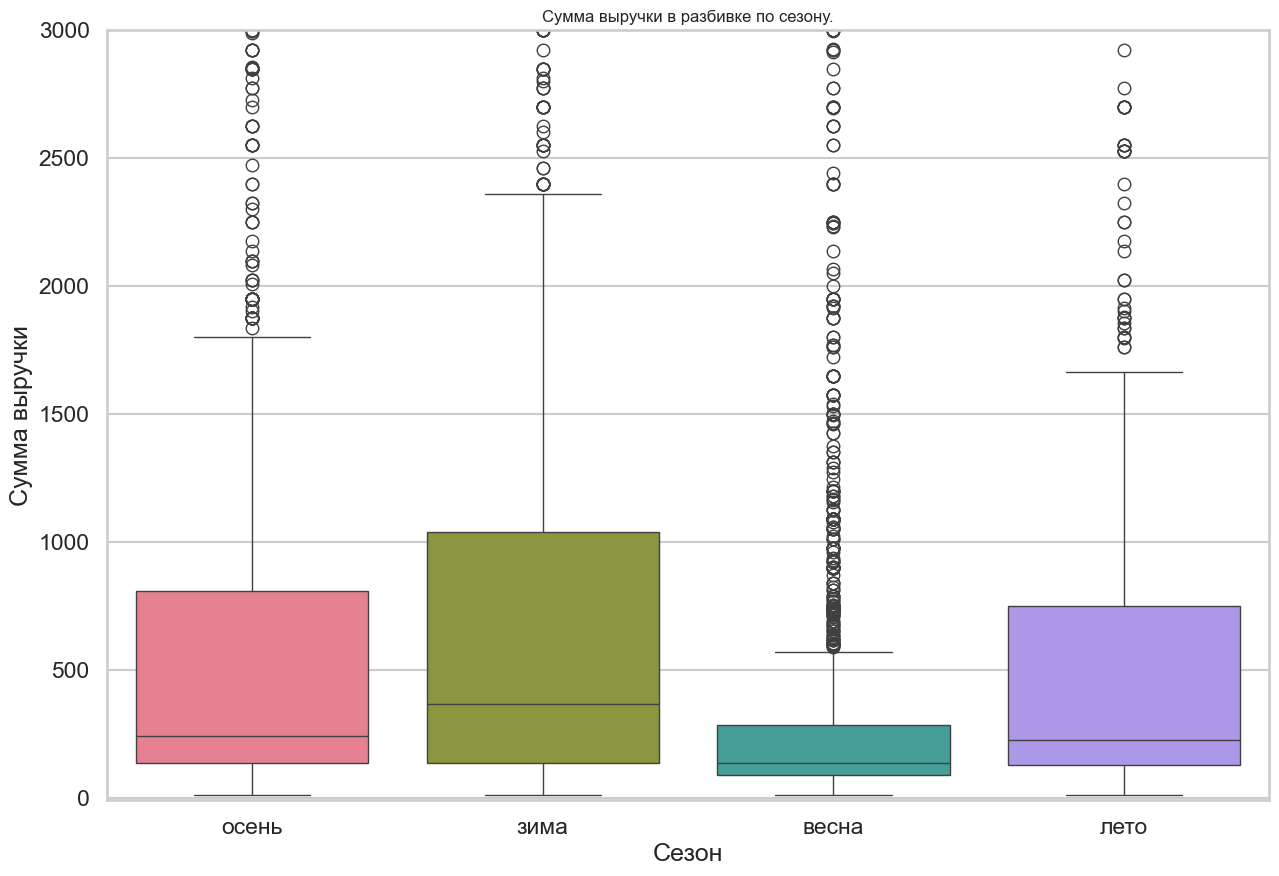

In [118]:
# построим график «ящик с усами» по выручке в разбивке по времени года.
sns.set(rc={'figure.figsize':(15, 10)})
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(x='season', y='revenue', data=data, palette='husl').set_ylim(-10, 3000)
plt.title('Сумма выручки в разбивке по сезону.', fontsize=12)
plt.xlabel('Сезон')
plt.ylabel('Сумма выручки')
plt.show()

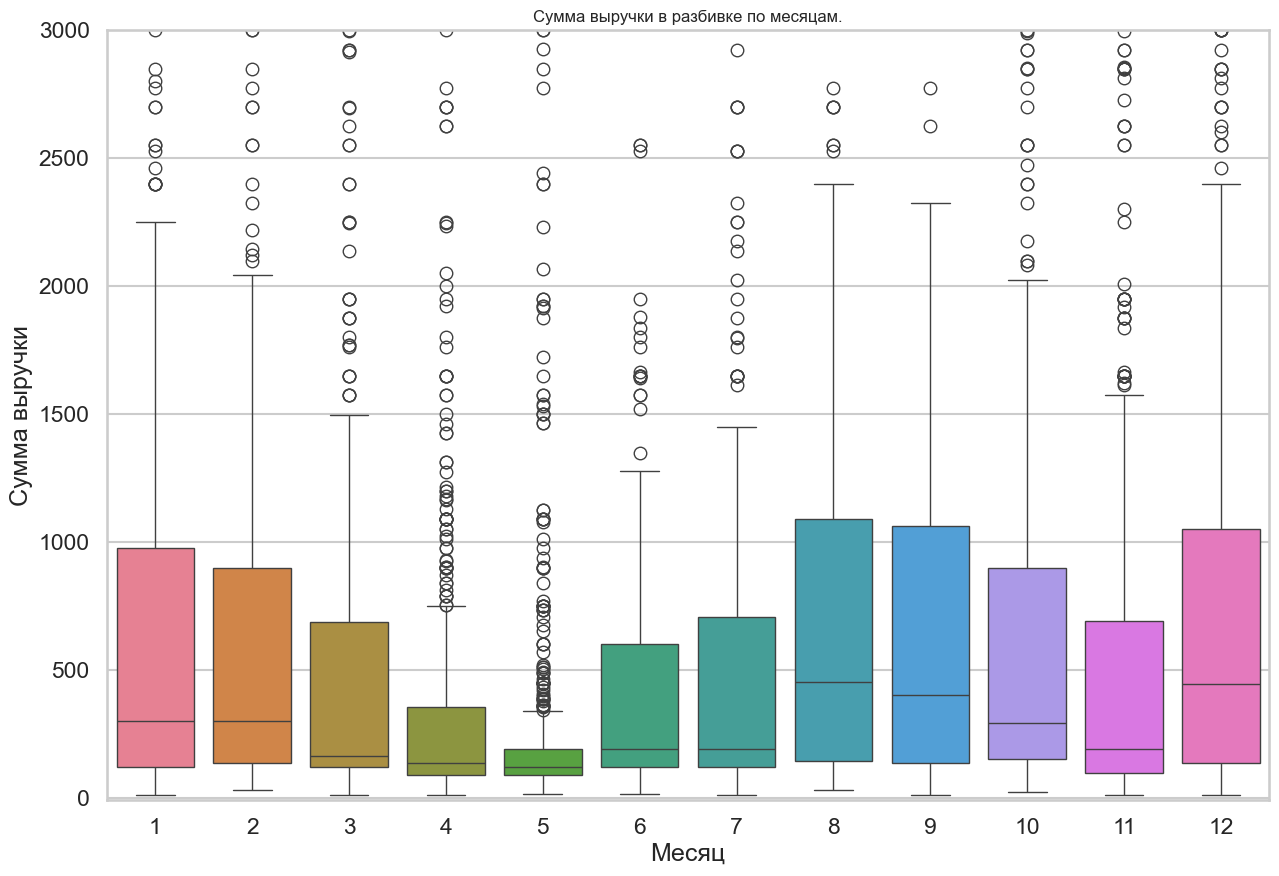

In [119]:
# построим график «ящик с усами» по выручке в разбивке по месяцам.
sns.set(rc={'figure.figsize':(15, 10)})
sns.set_style('whitegrid')  
sns.set_context('talk')
sns.boxplot(x='month', y='revenue', data=data, palette='husl').set_ylim(-10, 3000)
plt.title('Сумма выручки в разбивке по месяцам.', fontsize=12)
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки')
plt.show()

Сумма выручки в разбивке по сезону, показала, что, самый прибыльный период — это зимний. То есть, наибольшие объемы продаж приходятся на IV квартал года. Самые низкие доходы в весенний сезон, в месяц май. В разбивке по месяцам, это более наглядно.

### Выводы по результатам шага

 - в резульате категоризации сформированы 10 групп;
 - самую большую долю товарного ассортимента занимает категория «сад/огород» 55% от общего количества товарного ассортимента, можно её назвать основной. В эту категорию вошли все растения, рассада и элементы для дачи и сада. Потом идет категория «хранение» 13%, «кухня» 7%, «декор» 6%, «уборка» 6% и «ванная» 6%;
 - самая прибыльная категория — это «хранение», затем идёт категория «сад/огород». Менее прибыльная категория «гигиена».
 - по количеству заказов, самые продаваемые товары категории «сад/огород», затем идет категория «хранение», что подтверждает, что основной товарный ассортимент — это категории «сад/огород», а остальные — дополнительные. 
 - по среднему чеку, по показателю эффективности продаж, то категория «сад/огород» как основной ассортимент товара, дает самую малую выручку. Чтобы улучшить данный показатель следует, предлагать клиентам магазина приобрести сопутствующий товар со скидкой. **Можно работать с ассортиментом и его сортировкой, предлагая позиции дороже среднего чека. Проводить акции и спецпредложения.**
 - сумма выручки в разбивке по сезону, показала, что, самый прибыльный период — это зимний. То есть, наибольшие объемы продаж приходятся на IV квартал года. Самые низкие доходы в весенний сезон, в месяц май. В разбивке по месяцам, это более наглядно.

## Сегментация покупателей на основе истории их покупок

Для сегментации покупателей, необходимо провести кластеризацию. Кластеризация поможет выделить покупателей и предложить каждому сегменту подходящий вариант продукта и точную коммуникацию. Для этого необходимо рассчитать матрицу расстояний между всеми признаками с помощью класса linkage.

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков

Вспомним наши данные

In [120]:
data.sample(5)

date                           customer_id  order_id  \
2909  2019-04-16  aa30dda1-373f-4e2a-bedd-1105217ddd5a     14652   
22    2018-10-02  f08d9018-438e-4e96-b519-f74c0302a433     14480   
5708  2019-07-05  4a3e8c01-1d47-4867-8a7f-14195a8dbb3d     14893   
1193  2018-12-13  78b83e71-3389-4f6c-abbf-cf34290ebda7     69341   
1158  2018-12-10  a984c5b7-ff7e-4647-b84e-ef0b85a2762d     69289   

                                                product  quantity  price  \
2909  томата (помидор) баскью блю №7 сорт детерминан...         2  38.00   
22    многолетнее растение тимьян-чабрец розовый объ...         1  89.00   
5708    фуксия e4 в кассете 4 штуки цвет в ассортименте         1 262.00   
1193       таз пластмассовый 140 л пищевой (иж) 1404079         4 164.00   
1158       ручка-скоба рс-100 белая *трибатрон* 1108035       200  29.00   

      revenue  day  week  month  year  weekdays  weekends     category season  
2909    76.00    2    16      4  2019         1         0   cад/огород  весна  
22      89.00    2    40     10  2018         1         0   cад/огород  осень  
5708   262.00    5    27      7  2019         1         0   cад/огород   лето  
1193   656.00    4    50     12  2018         1         0       уборка   зима  
1158  5800.00    1    50     12  2018         1         0  инструменты   зима

In [121]:
# сгруппируем данные по клиентам (customer_id) и посчитаем метрики
customer_metrics = data.groupby('customer_id').agg({'order_id': 'nunique',
    'quantity': 'sum',  # Количество купленных товаров
    'revenue': 'sum',  # Общая выручка
    #'revenue': lambda x: x.groupby(data['category']).sum(),  # Количество принесенной выручки в разбивке по категориям
    'category': lambda x: x.value_counts().index[0],  # Любимая категория товара
    #'season': lambda x: x.value_counts().index[0],  # Любимый сезон
    #'frequency': lambda x: x.diff().mean().days,  # Средняя частота покупок
    'price': 'mean',  # Средняя стоимость заказа
    'weekdays': 'sum', # Совершение покупки в будний день
    'weekends': 'sum'  # Совершение покупки в будний день
})

In [122]:
# Найдём средний чек покупателя avg_check — разделим показатель revenue на orders.
customer_metrics['avg_check'] = customer_metrics['revenue'] / customer_metrics['quantity']
display(customer_metrics)

order_id  quantity  revenue    category  \
customer_id                                                                     
000d6849-084e-4d9f-ac03-37174eaf60c4         1         4   555.00  cад/огород   
001cee7f-0b29-4716-b202-0042213ab038         1         1   442.00  cад/огород   
00299f34-5385-4d13-9aea-c80b81658e1b         1         2   914.00      уборка   
002d4d3a-4a59-406b-86ec-c3314357e498         1         1  1649.00    хранение   
003bbd39-0000-41ff-b7f9-2ddaec152037         1         2  2324.00    хранение   
...                                        ...       ...      ...         ...   
ff601403-b094-4b86-9ac6-264d725b9277         2         2  1739.00    хранение   
ffaeab76-3a8d-49ee-860f-17273b2fc8a2         1         1   397.00      уборка   
ffb5976a-7a4d-460b-95c4-5ffaba31cb24         1         1   389.00  cад/огород   
ffb80538-3fda-4351-8ea9-9d2bec58bb07         1         1   974.00       кухня   
ffe82299-3f5b-4214-87fe-3d36ecccfac3         1         1   577.00  cад/огород   

                                       price  weekdays  weekends  avg_check  
customer_id                                                                  
000d6849-084e-4d9f-ac03-37174eaf60c4  138.75         4         0     138.75  
001cee7f-0b29-4716-b202-0042213ab038  442.00         0         1     442.00  
00299f34-5385-4d13-9aea-c80b81658e1b  457.00         1         0     457.00  
002d4d3a-4a59-406b-86ec-c3314357e498 1649.00         0         1    1649.00  
003bbd39-0000-41ff-b7f9-2ddaec152037 1162.00         0         1    1162.00  
...                                      ...       ...       ...        ...  
ff601403-b094-4b86-9ac6-264d725b9277  869.50         1         1     869.50  
ffaeab76-3a8d-49ee-860f-17273b2fc8a2  397.00         1         0     397.00  
ffb5976a-7a4d-460b-95c4-5ffaba31cb24  389.00         1         0     389.00  
ffb80538-3fda-4351-8ea9-9d2bec58bb07  974.00         1         0     974.00  
ffe82299-3f5b-4214-87fe-3d36ecccfac3  577.00         1         0     577.00  

[2405 rows x 8 columns]

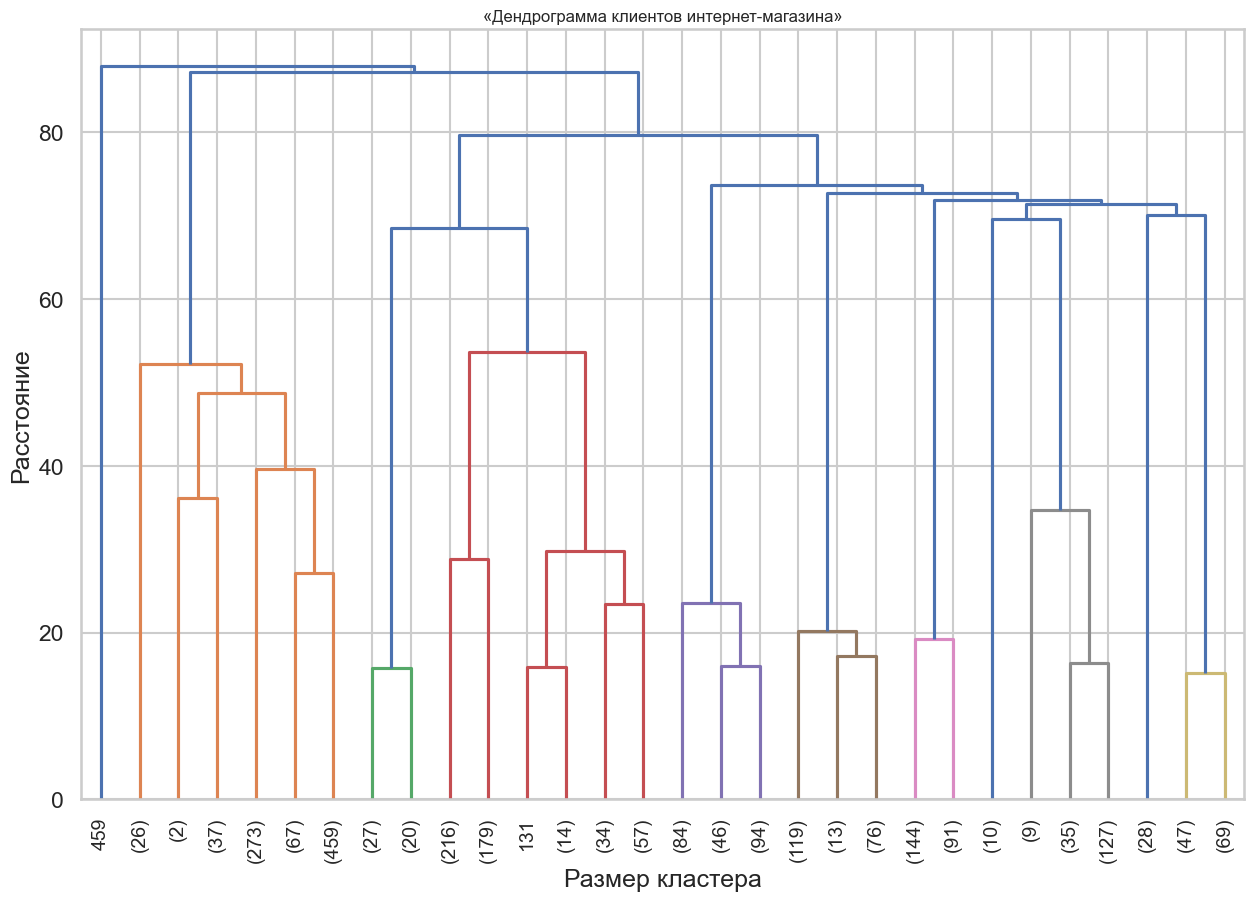

In [123]:
customer_metrics_encoded = pd.get_dummies(customer_metrics)
# Стандартизация данных
scaler = StandardScaler()
X_st = scaler.fit_transform(customer_metrics_encoded)
# Расчет матрицы расстояний с помощью метода linkage
linked = linkage(X_st, method='ward')
# Построение графика дендрограммы
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', show_leaf_counts=True, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=14)
plt.title("«Дендрограмма клиентов интернет-магазина»", fontsize=12)
plt.xlabel("Размер кластера")
plt.ylabel("Расстояние")
plt.show()

Разобъем нашу выборку на три кластера.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем сегменты покупателей.

In [124]:
# задаём модель k_means с числом кластеров n=3
k_means = KMeans(n_clusters = 3, random_state=1)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 1)
labels = k_means.fit_predict(X_st)

# присваиваю каждому наблюдению в датафрейме соответствующее значение кластера 
customer_metrics['cluster'] = labels
customer_metrics

order_id  quantity  revenue    category  \
customer_id                                                                     
000d6849-084e-4d9f-ac03-37174eaf60c4         1         4   555.00  cад/огород   
001cee7f-0b29-4716-b202-0042213ab038         1         1   442.00  cад/огород   
00299f34-5385-4d13-9aea-c80b81658e1b         1         2   914.00      уборка   
002d4d3a-4a59-406b-86ec-c3314357e498         1         1  1649.00    хранение   
003bbd39-0000-41ff-b7f9-2ddaec152037         1         2  2324.00    хранение   
...                                        ...       ...      ...         ...   
ff601403-b094-4b86-9ac6-264d725b9277         2         2  1739.00    хранение   
ffaeab76-3a8d-49ee-860f-17273b2fc8a2         1         1   397.00      уборка   
ffb5976a-7a4d-460b-95c4-5ffaba31cb24         1         1   389.00  cад/огород   
ffb80538-3fda-4351-8ea9-9d2bec58bb07         1         1   974.00       кухня   
ffe82299-3f5b-4214-87fe-3d36ecccfac3         1         1   577.00  cад/огород   

                                       price  weekdays  weekends  avg_check  \
customer_id                                                                   
000d6849-084e-4d9f-ac03-37174eaf60c4  138.75         4         0     138.75   
001cee7f-0b29-4716-b202-0042213ab038  442.00         0         1     442.00   
00299f34-5385-4d13-9aea-c80b81658e1b  457.00         1         0     457.00   
002d4d3a-4a59-406b-86ec-c3314357e498 1649.00         0         1    1649.00   
003bbd39-0000-41ff-b7f9-2ddaec152037 1162.00         0         1    1162.00   
...                                      ...       ...       ...        ...   
ff601403-b094-4b86-9ac6-264d725b9277  869.50         1         1     869.50   
ffaeab76-3a8d-49ee-860f-17273b2fc8a2  397.00         1         0     397.00   
ffb5976a-7a4d-460b-95c4-5ffaba31cb24  389.00         1         0     389.00   
ffb80538-3fda-4351-8ea9-9d2bec58bb07  974.00         1         0     974.00   
ffe82299-3f5b-4214-87fe-3d36ecccfac3  577.00         1         0     577.00   

                                      cluster  
customer_id                                    
000d6849-084e-4d9f-ac03-37174eaf60c4        1  
001cee7f-0b29-4716-b202-0042213ab038        1  
00299f34-5385-4d13-9aea-c80b81658e1b        1  
002d4d3a-4a59-406b-86ec-c3314357e498        1  
003bbd39-0000-41ff-b7f9-2ddaec152037        1  
...                                       ...  
ff601403-b094-4b86-9ac6-264d725b9277        1  
ffaeab76-3a8d-49ee-860f-17273b2fc8a2        1  
ffb5976a-7a4d-460b-95c4-5ffaba31cb24        1  
ffb80538-3fda-4351-8ea9-9d2bec58bb07        1  
ffe82299-3f5b-4214-87fe-3d36ecccfac3        1  

[2405 rows x 9 columns]

In [125]:
customer_metrics.groupby('cluster').agg({'order_id' : 'count'})

order_id
cluster          
0             208
1            2196
2               1

Посмотрим на статистику по сегментам покупателей.

In [126]:
# Выводим статистику по кластерам.
display(customer_metrics.groupby(['cluster']).mean().T)

TypeError: agg function failed [how->mean,dtype->object]

**Результаты шага:**

По результатам кластеризации мы имеем следующие характеристики для каждого:

Кластер 0 - покупатель товаров низкой стоимости: среднее количество заказов 1,4, количество товаров в заказе - 5,4, средняя суммарная выручка 1122,95, среднее количество будних дней 1.82, среднее количество выходных 0,56, средний чек заказа 426,94.

Кластер 2 - нестандартный единоразовый заказ, на оптовую покупку одного товара.

Кластер 1 - покупатель товаров высокой стоимости:: среднее количество заказов 1,3, количество товаров в заказе - 3,94, средняя суммарная выручка 2977,49, среднее количество будних дней 1.08, среднее количество выходных 0,3, средний чек заказа 1834,5.

Из результатов видно, что профили покупателей значительно различаются. Есть клиенты, которые покупают больше товаров более низкой цены, а есть которые делают покупки дорогих товаров, на за один заказ калдут в корзину меньше товаров.

## Проверка статистических гипотез

### Расчет статистической значимости различий в среднем чеке заказа между сегментами покупателей

Для проверки гипотез возьмем сравнение кластеров 0 и 1. Так как второй кластер представляет собой единичный оптовый заказ.

Сформулируем нулевую и альтернативную гипотезы:
 - **Нулевая гипотеза H₀**: Нет статистически значимых различий в среднем чеке между сегментами покупателей.
 - **Альтернативная гипотеза H₁**: Есть статистически значимое различие в среднем чеке между между сегментами покупателей.

In [127]:
# генерируем две независимые выборки. 
cluster0 = customer_metrics[customer_metrics['cluster']==0]['avg_check']
cluster1 = customer_metrics[customer_metrics['cluster']==1]['avg_check']
cluster2 = customer_metrics[customer_metrics['cluster']==2]['avg_check']

Найдем соотношение дисперсий, и в случае различия более чем на 5 %, принять, что дисперсии не равны.

In [128]:
# оценим дисперсию по выборке cluster0 и cluster1.
display("Дисперсия 0-го кластера: {} ".format(np.var(cluster0, ddof=1)))
display("Дисперсия 1-го кластера: {} ".format(np.var(cluster1, ddof=1)))
display("Соотношение дисперсий: {} ".format((np.var(cluster1, ddof=1))/(np.var(cluster0, ddof=1))))

'Дисперсия 0-го кластера: 663708.9700544308 '

'Дисперсия 1-го кластера: 1091771.4682814183 '

'Соотношение дисперсий: 1.6449551196993497 '

In [129]:
# Выполним проверку гипотезы.
alpha = 0.05 # критический уровень статистической значимости 
results = stats.mannwhitneyu(cluster0, cluster2) #alternative='two-sided'

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

0.8488029626345861

'Не получилось отвергнуть нулевую гипотезу'

In [130]:
display("Медиана 0-го кластера: {} ".format(int(np.median(cluster0))))
display("Медиана 2-го кластера: {} ".format(int(np.median(cluster2))))

'Медиана 0-го кластера: 544 '

'Медиана 2-го кластера: 675 '

**Результат проверки гипотезы:**
P-value = 0,109 значительно меньше 0,05. Значит, отвергаем нулевую гипотезу и считать, что в среднем чеке присутствуют статистически значимые различия.

### Расчет статистической значимости различий в среднем объёме продаж между сегментами покупателей

Сформулируем нулевую и альтернативную гипотезы:
 - **Нулевая гипотеза H₀**: Нет статистически значимых различий в среднем объёме продаж между сегментами покупателей.
 - **Альтернативная гипотеза H₁**: Есть статистически значимое различие в среднем объёме продаж между сегментами покупателей.

In [149]:
# генерируем две независимые выборки.
sales_volume_cluster0 = customer_metrics[customer_metrics['cluster']==0]['revenue']
sales_volume_cluster1 = customer_metrics[customer_metrics['cluster']==1]['revenue']

In [150]:
# оценим дисперсию по выборке sales_volume_cluster0 и sales_volume_cluster1.
display("Дисперсия 0-го кластера: {} ".format(np.var(sales_volume_cluster0, ddof=1)))
display("Дисперсия 1-го кластера: {} ".format(np.var(sales_volume_cluster1, ddof=1)))
display("Соотношение дисперсий: {} ".format((np.var(sales_volume_cluster1, ddof=1))/(np.var(sales_volume_cluster0, ddof=1))))

'Дисперсия 0-го кластера: 3749445.28061336 '

'Дисперсия 1-го кластера: nan '

'Соотношение дисперсий: nan '

In [151]:
# Выполним проверку гипотезы.
alpha = 0.05 # критический уровень статистической значимости 
results = stats.mannwhitneyu(sales_volume_cluster0, sales_volume_cluster1) 

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

0.0835829731962902

'Не получилось отвергнуть нулевую гипотезу'

In [152]:
display("Медиана 0-го кластера: {} ".format(int(np.median(sales_volume_cluster0))))
display("Медиана 2-го кластера: {} ".format(int(np.median(sales_volume_cluster1))))

'Медиана 0-го кластера: 676 '

'Медиана 2-го кластера: 675000 '

**Результат проверки гипотезы:**
P-value значительно больше 0,05, это говорит о том, что есть статистически значимое различие в среднем объёме продаж между сегментами покупателей.

### Расчет статистической значимости различий в среднем объёме продаж в будни и выходные одинаковые

Сформулируем нулевую и альтернативную гипотезы:
 - **Нулевая гипотеза H₀**: Средние объёмы продаж в будни и выходные одинаковые.
 - **Альтернативная гипотеза H₁**: Средние объёмы продаж в будни и выходные разные.

In [153]:
# генерируем две независимые выборки.
sales_volume_weekdays = customer_metrics[customer_metrics['weekdays']==1]['revenue']
sales_volume_weekends = customer_metrics[customer_metrics['weekends']==1]['revenue']

In [154]:
# Оценим дисперсию по выборке sales_volume_weekdays и sales_volume_weekends.
display("Дисперсия объём продаж в будни: {} ".format(np.var(sales_volume_weekdays, ddof=1)))
display("Дисперсия объём продаж в выходные: {} ".format(np.var(sales_volume_weekends, ddof=1)))
display("Соотношение дисперсий: {} ".format((np.var(sales_volume_weekdays, ddof=1))/(np.var(sales_volume_weekends, ddof=1))))

'Дисперсия объём продаж в будни: 370115229.0149345 '

'Дисперсия объём продаж в выходные: 1848073.194505339 '

'Соотношение дисперсий: 200.27087136773318 '

In [155]:
display("Стандартное отклонение объём продаж в будни: {} ".format(np.std(sales_volume_weekdays, ddof=1)))
display("Стандартное отклонение объём продаж в выходные: {} ".format(np.std(sales_volume_weekends, ddof=1)))

'Стандартное отклонение объём продаж в будни: 19238.379064124256 '

'Стандартное отклонение объём продаж в выходные: 1359.4385585620776 '

In [156]:
# Выполним проверку гипотезы. Будем использовать метод ttest_ind.
alpha = 0.05

results = st.ttest_ind(sales_volume_weekdays, sales_volume_weekends)

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

0.4088672464012777

'Не получилось отвергнуть нулевую гипотезу'

**Результат проверки гипотезы:**
P-value значительно больше 0,05. Средние объёмы продаж в будни и выходные одинаковые. Не получилось отвергнуть нулевую гипотезу.

## Выводы по результатам всего анализа и рекомендации

**Выводы по результатам предобработки данных:**
 - В процессе анализа данных были обнаружены следующие проблемы: некорректный формат даты, различия в регистре букв в столбце с наименованием товара, выбросы в количестве и цене товара.
 - В процессе предварительной обработки данных были приняты следующие решения: приведение даты к правильному формату, приведение наименования товара к нижнему регистру и замена символа "ё" на "е". Также были обнаружены неполные дубликаты в столбцах с наименованием товара и идентификатором заказа. Учитывая, что доля дубликатов составляет 25% от общего количества записей, было принято решение удалить их. Возможно, это было вызвано ошибками при выгрузке или записи данных.
 - Рассмотренные товары с аномальным количеством закзаов при детальном рассмотрении являются нормальными: их покупали как в одном экземпляре, так и оптом разные покупатели в разные промежутки времени. Поэтому удалять их из датасепта нецелесообразно
 - Добавлены необходимые столбцы для последующего исследования. 

    **РЕЗУЛЬТАТЫ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА**

В датасете представлены данные за период: с 2018-10-01 по 2020-01-31, один год и три месяца. 

 - У нас есть данные с 1 октября 2018 года по 31 января 2020 года, что составляет 487 дней. С апреля 2019 года мы видим рост числа покупок, достигая пика в июне 2019 года. Также наблюдается некоторая сезонность в продажах.
 - Большинство покупателей сделали всего один заказ, а количество клиентов, сделавших 3 заказа, очень мало. Также есть пользователи, которые сделали 5, 7, 16, 33 и 125 заказов, что кажется странным и может указывать на аномалии.
 - Не более 5% клиентов сделали более 2 заказов, и не более 1% клиентов сделали более 3 заказов. Разумно выбрать 3 заказа как нижнюю границу числа заказов для клиента и исключить аномальных клиентов, которые превышают эту границу.
 - Среднее количество уникальных покупателей в месяц составляет 194 человека, что является небольшим числом. Метрика "липкого фактора" (sticky factor) показывает низкие значения, что означает, что клиенты обращаются в интернет-магазин нечасто.
 - С февраля 2019 года по апрель 2019 года мы видим рост активности покупателей, затем наблюдается снижение активности с апреля до конца июня 2019 года. В июле 2019 года мы видим небольшой рост числа уникальных покупателей. Активность покупателей также проявляется в конце 2019 года и начале 2020 года.
 - Общая сумма выручки составляет 4294974.42 у.е., а средняя выручка с одного покупателя - 1785.85 у.е.
 - За весь период с 2018 по 2020 годы наблюдается негативная динамика суммарной выручки от продаж. Общая сумма выручки в конце 2019 года сократилась почти в 1,3 раза по сравнению с предыдущим годом. Возможной причиной может быть общее ухудшение условий предпринимательской деятельности.
 - Средний чек по месяцам имеет стабильный негативный тренд в течение года.
 - Наблюдается логическая взаимосвязь между переменными. Существует небольшая положительная корреляция между выручкой и ценой товара (corr = 0,85), что означает, что чем выше цена товара, тем больше выручка. Также есть другие переменные, которые положительно коррелируют с выручкой, такие как количество заказов и товара.

**Результаты анализа товарного ассортимента**

 - В резульате категоризации сформированы 10 групп;
 - Самую большую долю товарного ассортимента занимает категория «сад/огород» 55% от общего количества товарного ассортимента, можно её назвать основной. В эту категорию вошли все растения, рассада и элементы для дачи и сада. Потом идет категория «хранение» 13%, «кухня» 7%, «декор» 6%, «уборка» 6% и «ванная» 6%;
 - Самая прибыльная категория — это «хранение», затем идёт категория «сад/огород». Менее прибыльная категория «гигиена».
 - По количеству заказов, самые продаваемые товары категории «сад/огород», затем идет категория «хранение», что подтверждает, что основной товарный ассортимент — это категории «сад/огород», а остальные — дополнительные. 
 - По среднему чеку, по показателю эффективности продаж, то категория «сад/огород» как основной ассортимент товара, дает самую малую выручку. Чтобы улучшить данный показатель следует, предлагать клиентам магазина приобрести сопутствующий товар со скидкой. **Можно работать с ассортиментом и его сортировкой, предлагая позиции дороже среднего чека. Проводить акции и спецпредложения.**
 - Сумма выручки в разбивке по сезону, показала, что, самый прибыльный период — это зимний. То есть, наибольшие объемы продаж приходятся на IV квартал года. Самые низкие доходы в весенний сезон, в месяц май. В разбивке по месяцам, это более наглядно.

**Результаты сегментации покупателей**

По результатам кластеризации мы имеем следующие характеристики для каждого:

Кластер 0 - покупатель товаров низкой стоимости: среднее количество заказов 1,4, количество товаров в заказе - 5,4, средняя суммарная выручка 1111,3, среднее количество будних дней 1.82, среднее количество выходных 0,57, средний чек заказа 414,15.

Кластер 1 - нестандартный единоразовый заказ, на оптовую покупку одного товара.

Кластер 2 - покупатель товаров высокой стоимости:: среднее количество заказов 1,26, количество товаров в заказе - 3,93, средняя суммарная выручка 3070,83, среднее количество будних дней 1.05, среднее количество выходных 0,3, средний чек заказа 1889.

Из результатов видно, что профили покупателей значительно различаются. Есть клиенты, которые покупают больше товаров более низкой цены, а есть которые делают покупки дорогих товаров, на за один заказ калдут в корзину меньше товаров.

**Результаты проверки статистических гипотез**
 - Средний чек между сегментами покупателей отличается значительно.
 - Средние объёмы продаж между сегментами покупателей разные.
 - Средние объёмы продаж в будни и выходные одинаковые.


   **РЕКОМЕНДАЦИИ**
   
 - Увеличить средний чек в категории "сад/огород" путем предложения клиентам магазина покупать сопутствующие товары со скидкой. Можно также пересмотреть ассортимент и его сортировку, предлагая более дорогие товары. Проводить акции и специальные предложения.
 - Увеличить объемы продаж путем исследования причин снижения доходов. Необходимо рассмотреть факторы, влияющие на продажи, такие как общие условия предпринимательской деятельности, управление, персонал; каналы сбыта товара; сезонная динамика продаж и ассортимент товаров. Учесть, что осенне-зимний период прибылен для категорий "кухня", "ванная", "уборка", "инструменты", "декор". Весенне-летний период прибылен для категории "гигиена". Весна и осень прибыльны для категорий "сад", "хранение", "мебель", "текстиль"; количество покупателей; конкуренты; общая динамика рынка.
 - Создавать актуальные рекомендации внутри товарной категории в зависимости от сезона.
 - Формировать привычку у покупателей заходить в интернет-магазин чаще.
 - **`Улучшить средний чек категории «сад/огород» как основной ассортимент товара.`** Для этого необходимо, предлагать клиентам магазина приобрести сопутствующий товар со скидкой. Можно работать с ассортиментом и его сортировкой, предлагая позиции дороже среднего чека. Проводить акции и спецпредложения.

 - **`Увеличить объёмы продаж.`** Поискать причину снижения доходов, для этого необходимо посмотреть на факторы, которые влияют на продажи. Факторы, могут быть следующими: 
     - общии условия предпринимательской деятельности, руководство, персонал;
     - каналы сбыта товара;
     - сезонная динамика продаж, товарный ассортимент. Учитывать, что, период осенне-зимний, прибыльный по категориям «кухня», «ванная», «уборка», «инструменты», «декор». Период весенне-летний, прибыльный по категориям ««гигиена». Период весна и осень, прибыльный по категориям «сад», «хранение», «мебель», «текстиль»;
     - количество покупателей ;
     - конкуренты;
     - общая динамика рынка.
 - **`В зависимости от сезона, создавать актуальные рекомендательные предложения внутри товарной категории.`**
 - **`Также, у покупателей необходимо формировать привычку заходить в интернет-магазин почаще.`**

## Ссылка на презентацию

**Ссылка на презентацию:** [E-commerce Выявление профилей потребления магазина - Розов К.А.»](https://docs.google.com/presentation/d/1eiSuC2nw6J1CsBYyMpbrrzjowXkOa5Wuug5GhhlogTc/edit?usp=sharing)